#### Laboratorio No.2 
1. Nombre: Franz Castillo. 
2. Carnet: 22003738. 

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 


In [4]:
### Cargamos el dataset 
dataHP = pd.read_csv('train_HP.csv')


### Clasificamos las columnas del dataset en continuas, discretas y categoricas. 

In [5]:
dataset=dataHP
def getColumnTypes(dataset):
    '''Esta función extrae el tipo de dominio de las columnas de un dataset
    Entradas: Pandas Dataframe
    Salida: Tupla con arreglo que contiene nombres de las columnas'''
    continuas= []
    discretas = []
    categoricas = []
    for col in dataset.columns:
        if(dataset[col].dtypes=='int64' or (dataset[col].dtype=='float64')):
            if(len(dataset[col].unique())>30):
               continuas.append(col)
            else:
               discretas.append(col)
        else: 
               categoricas.append(col) 
    return continuas, discretas, categoricas   
                   

In [6]:
## Vemos cuales son las variables continuas 
continuas, discretas, categoricas = getColumnTypes(dataHP)
print(continuas)
print(discretas)
print(categoricas) 


['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Gar

In [8]:
from scipy import stats

In [7]:
##Creamos función para detectar outliers. 
dataset =dataHP
col='SalePrice'
def plotDistBoxQQ(dataset,col):
    '''
    Descripción: Muestra las graficas de distribución, Boxplot y QQ-Plot para detectar outliers
    Input: dataset -> pandas dataframe, col -> string con nombre de columna. 
    Output: Visualización de plots.
    '''
    
    plt.figure(figsize=(20,6))

    plt.subplot(1,3,1)
    sns.distplot(dataset[col],bins=30)
    plt.title("Histograma y Densidad")

    plt.subplot(1,3,2)
    sns.boxplot(y=dataset[col])
    plt.title("Boxplot")

    plt.subplot(1,3,3)
    stats.probplot(dataset[col],dist="norm",plot=plt)
    plt.title("Boxplot")

C:\Users\Franz Castillo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Franz Castillo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Franz Castillo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

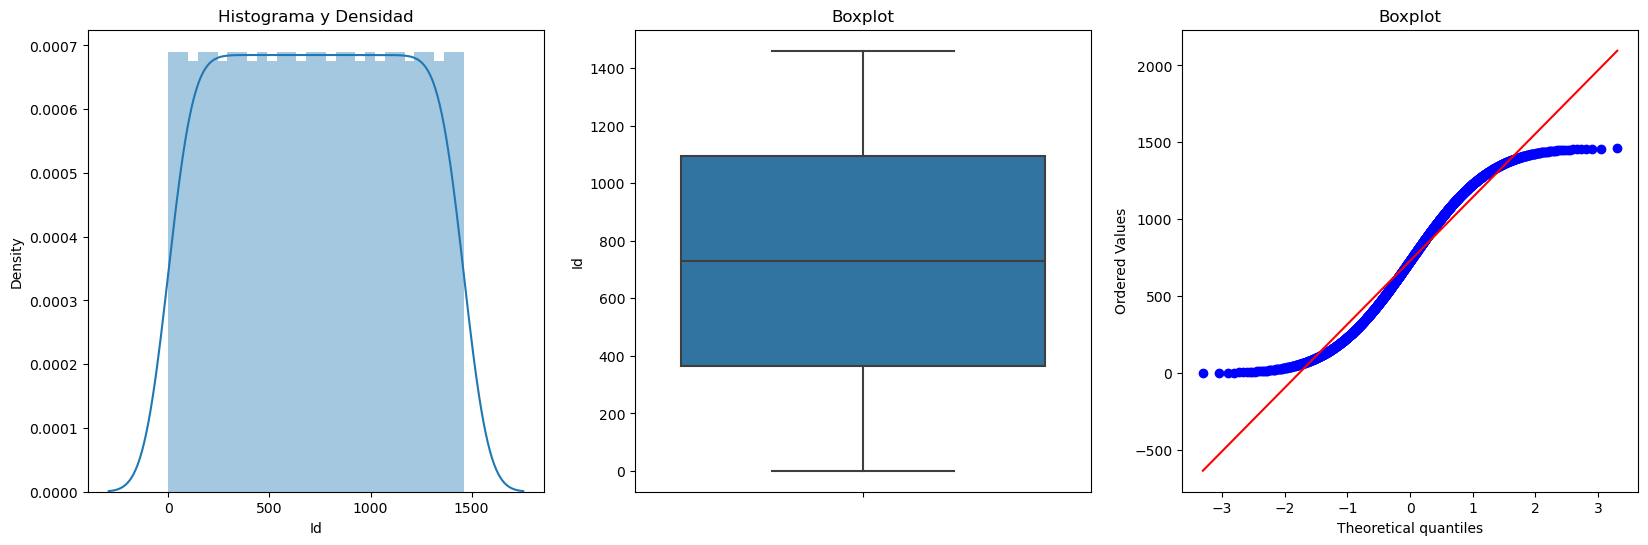

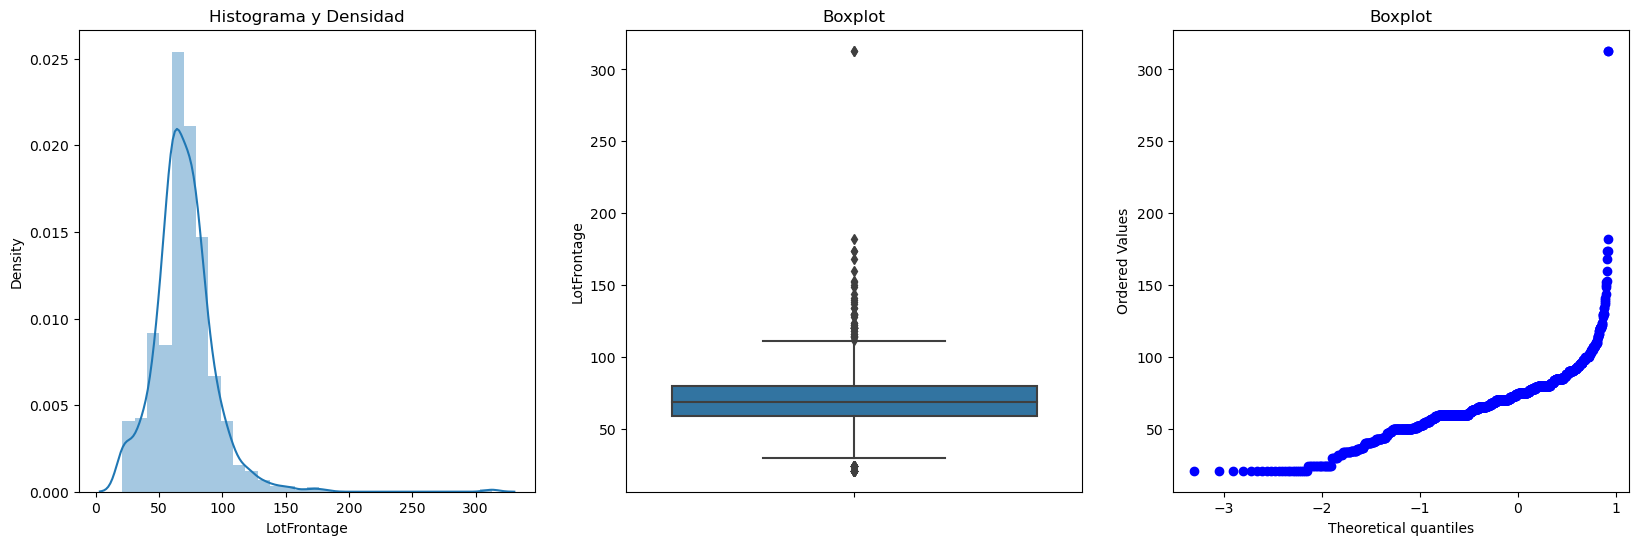

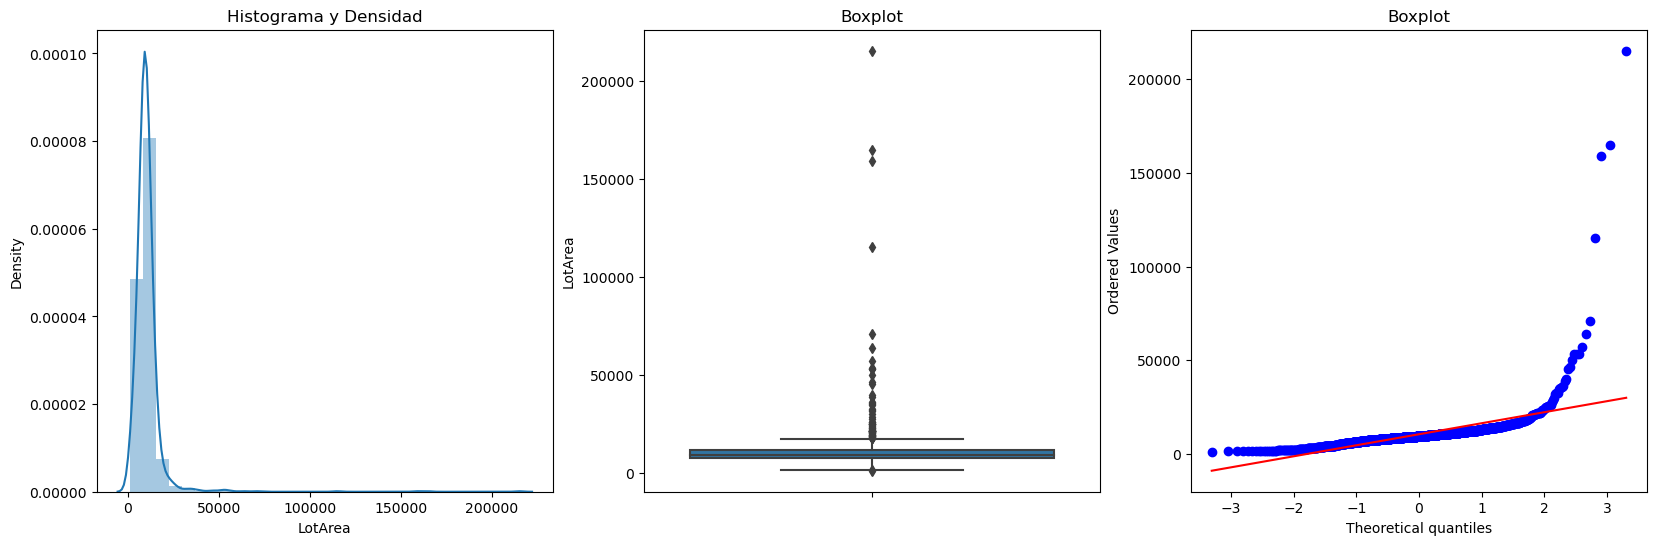

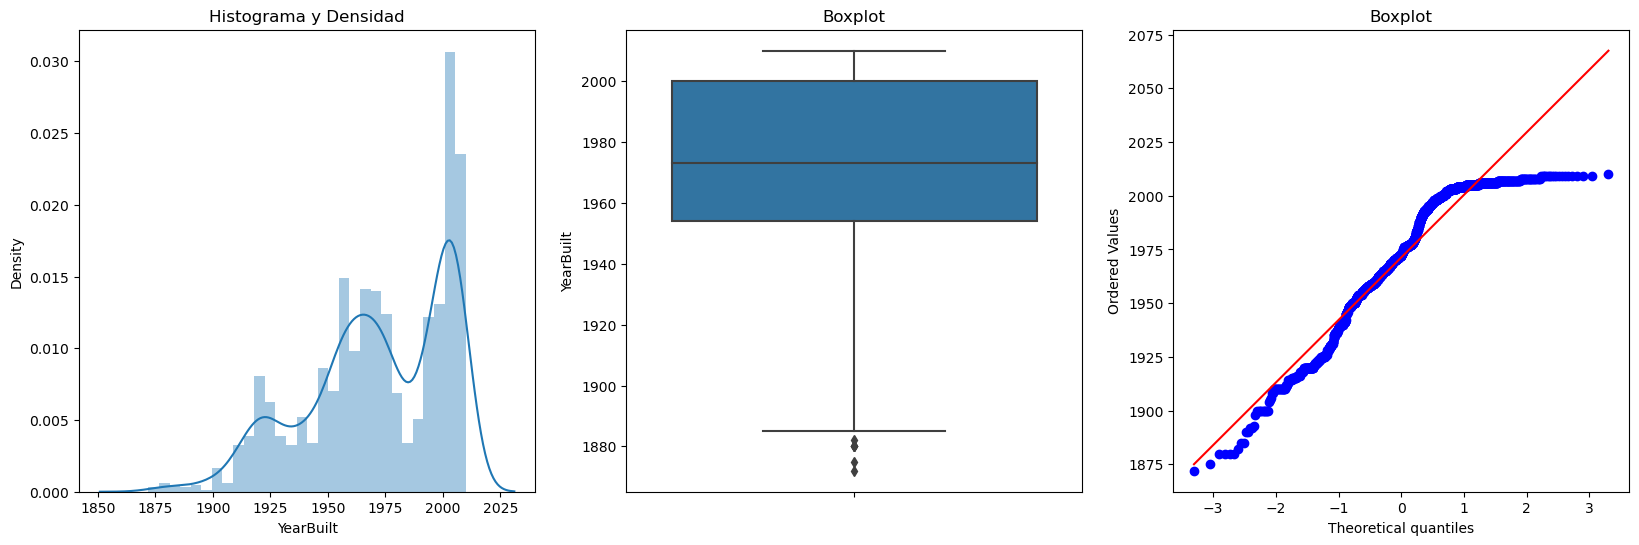

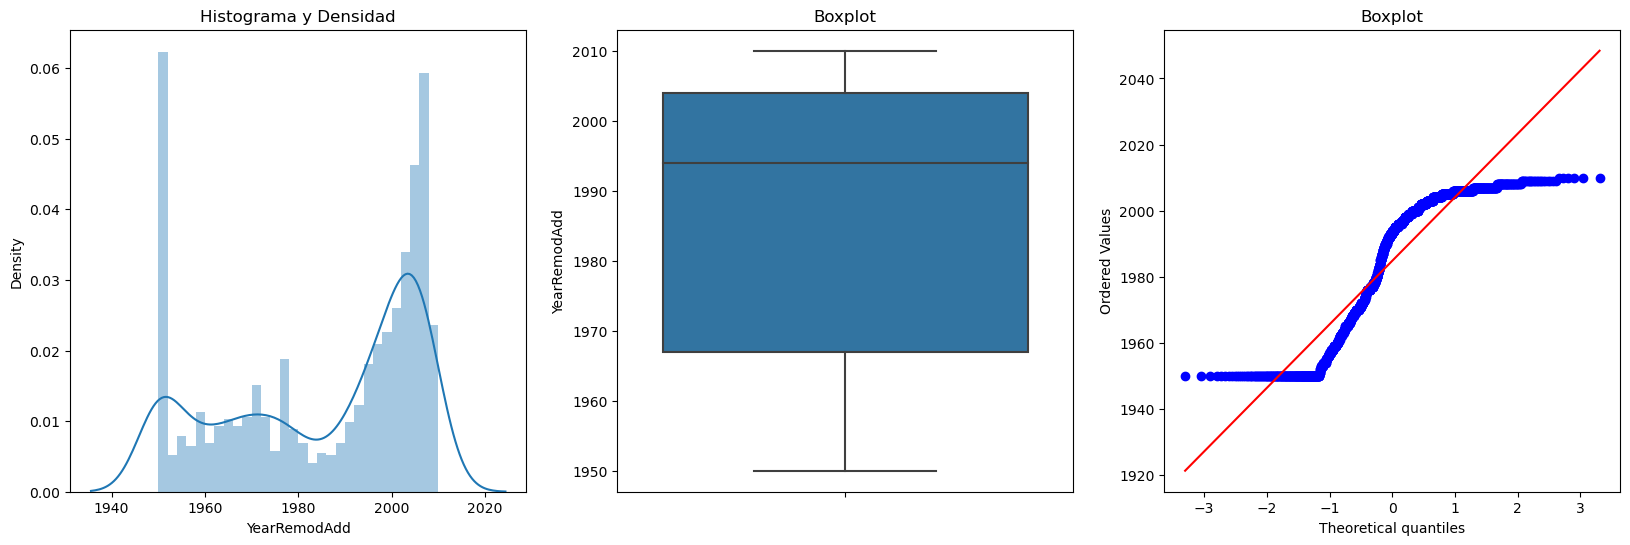

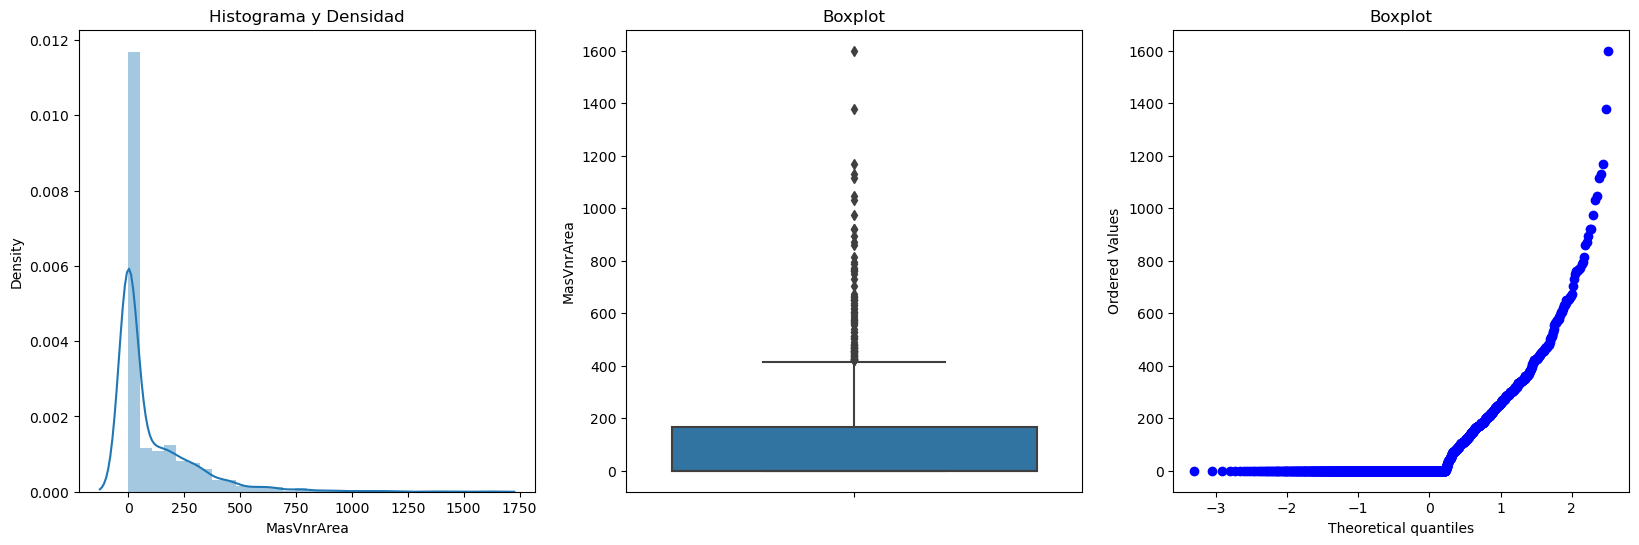

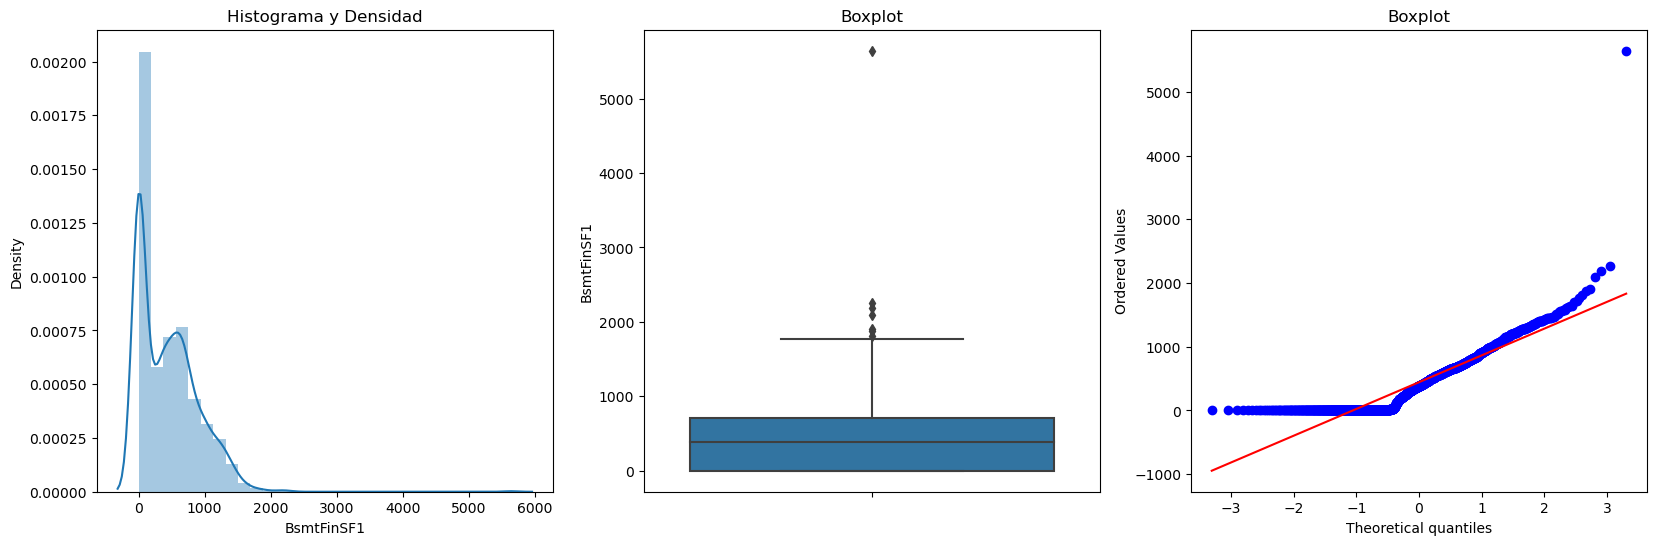

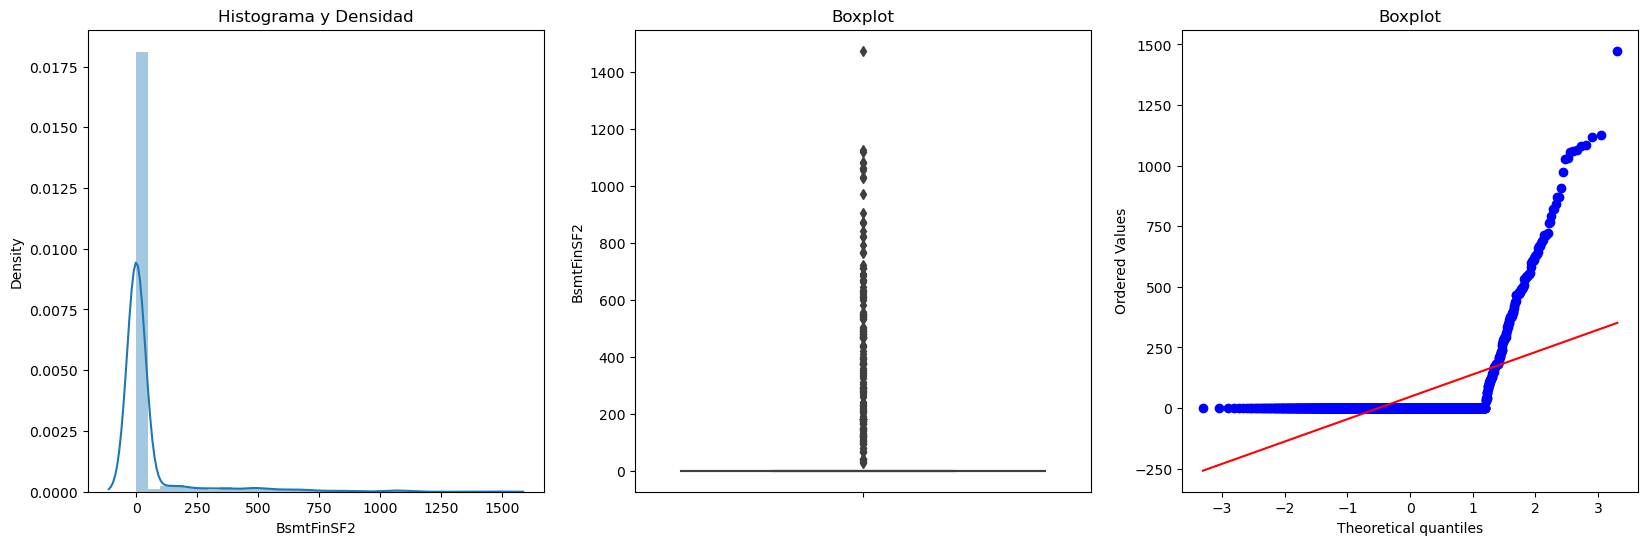

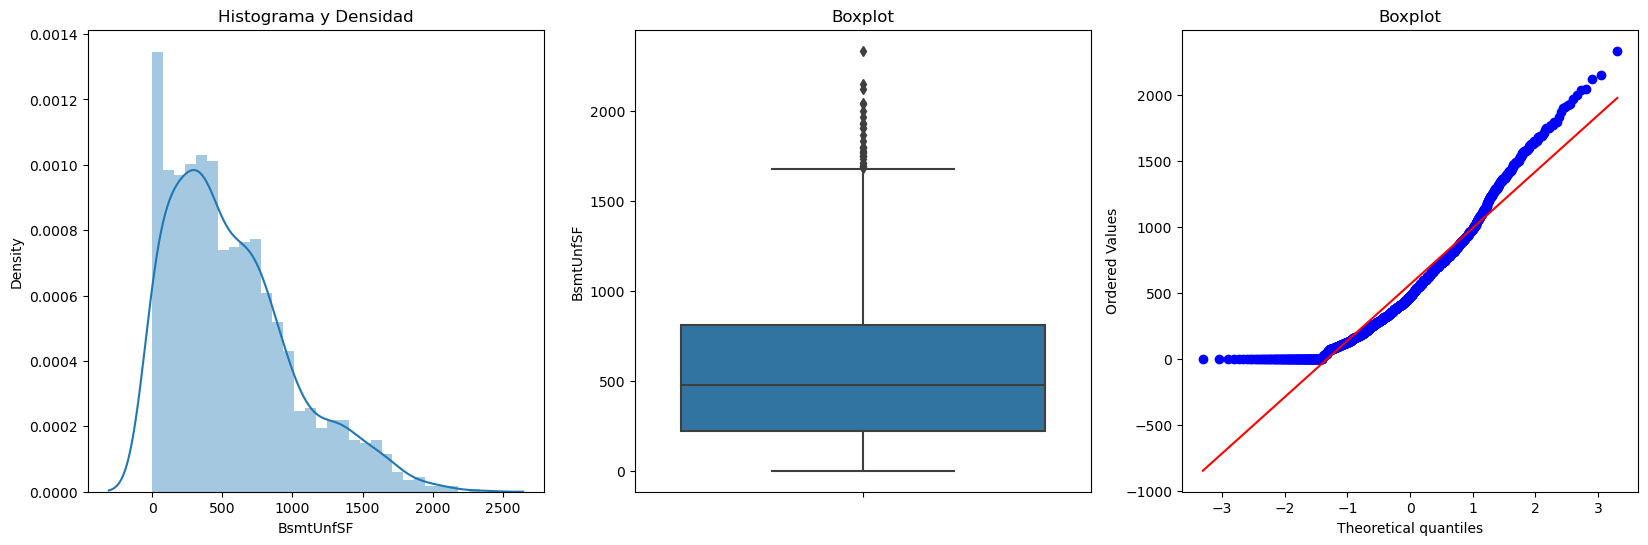

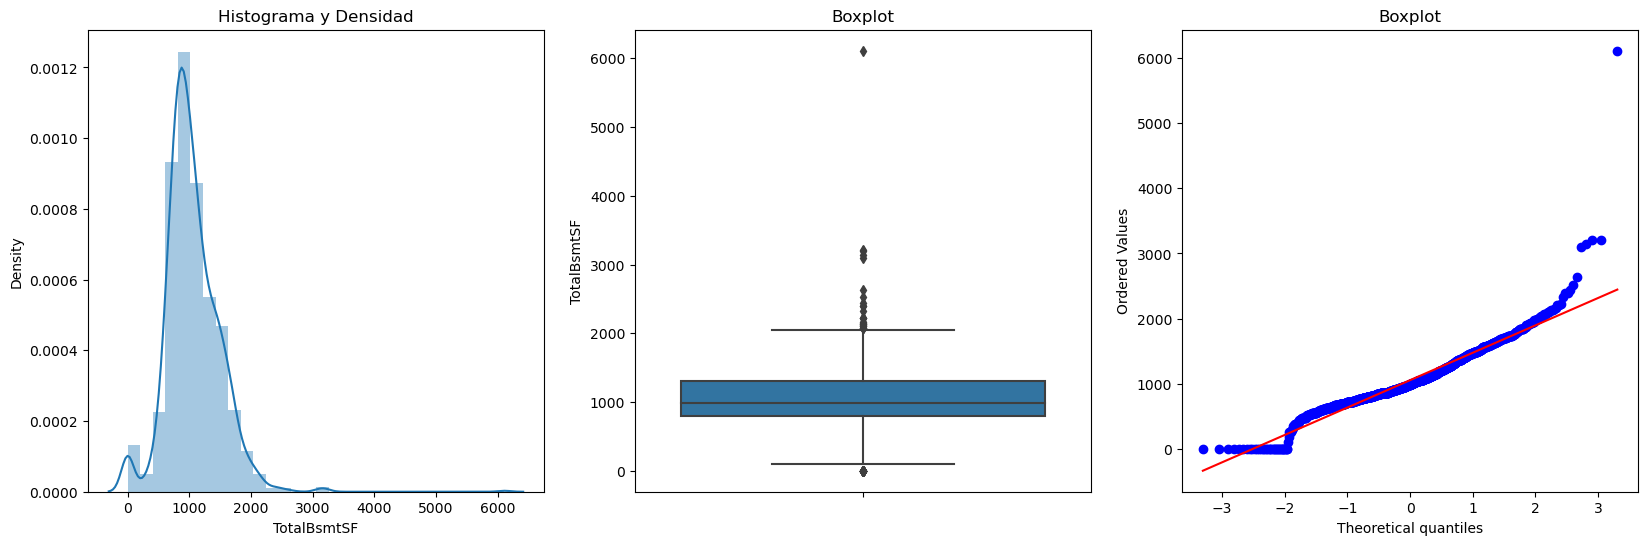

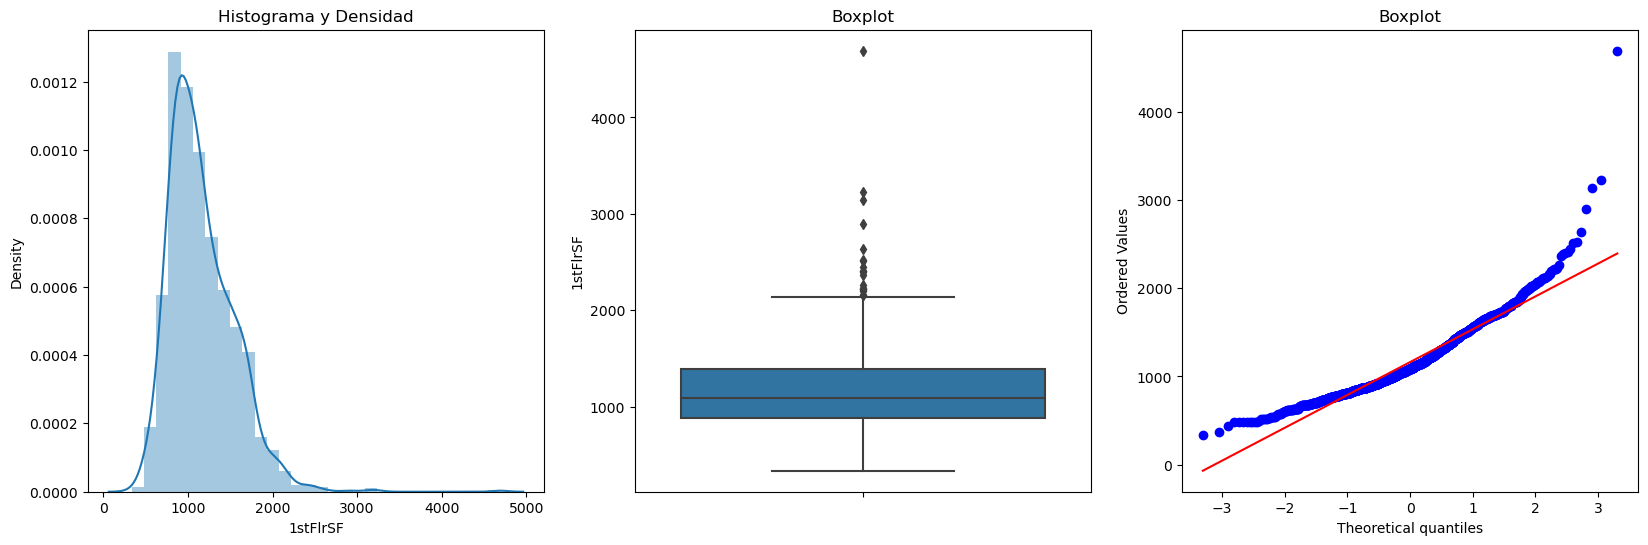

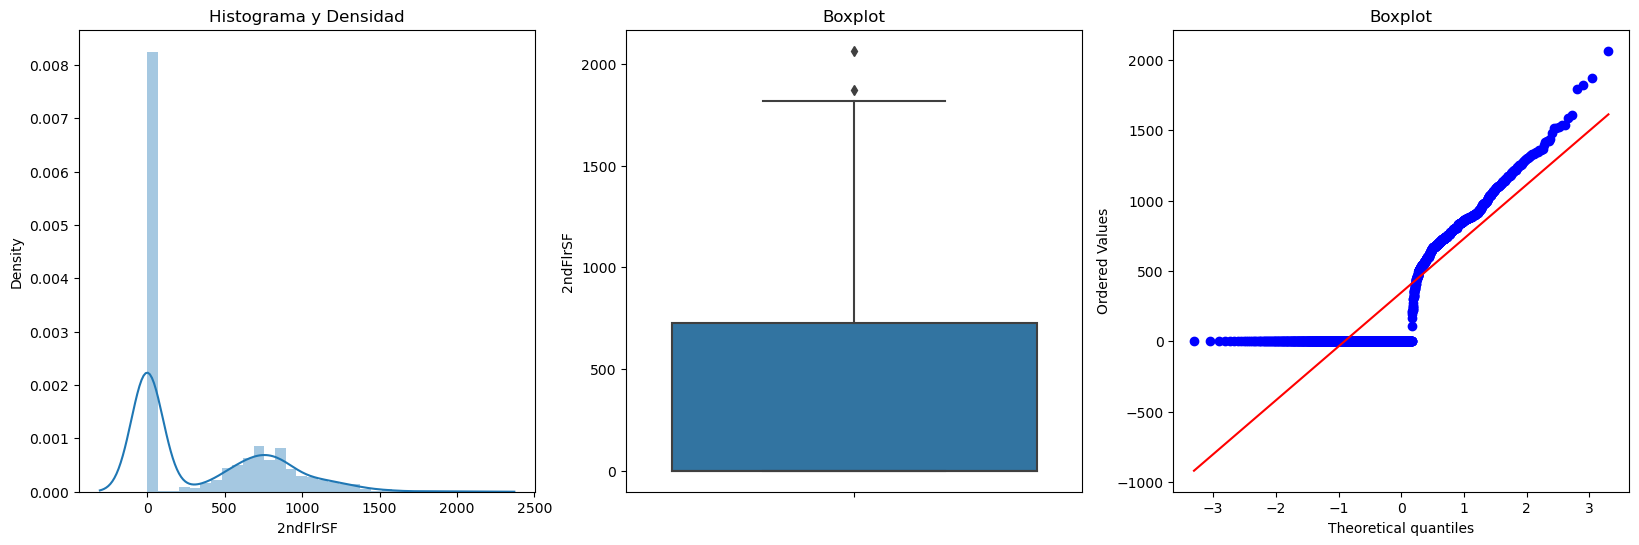

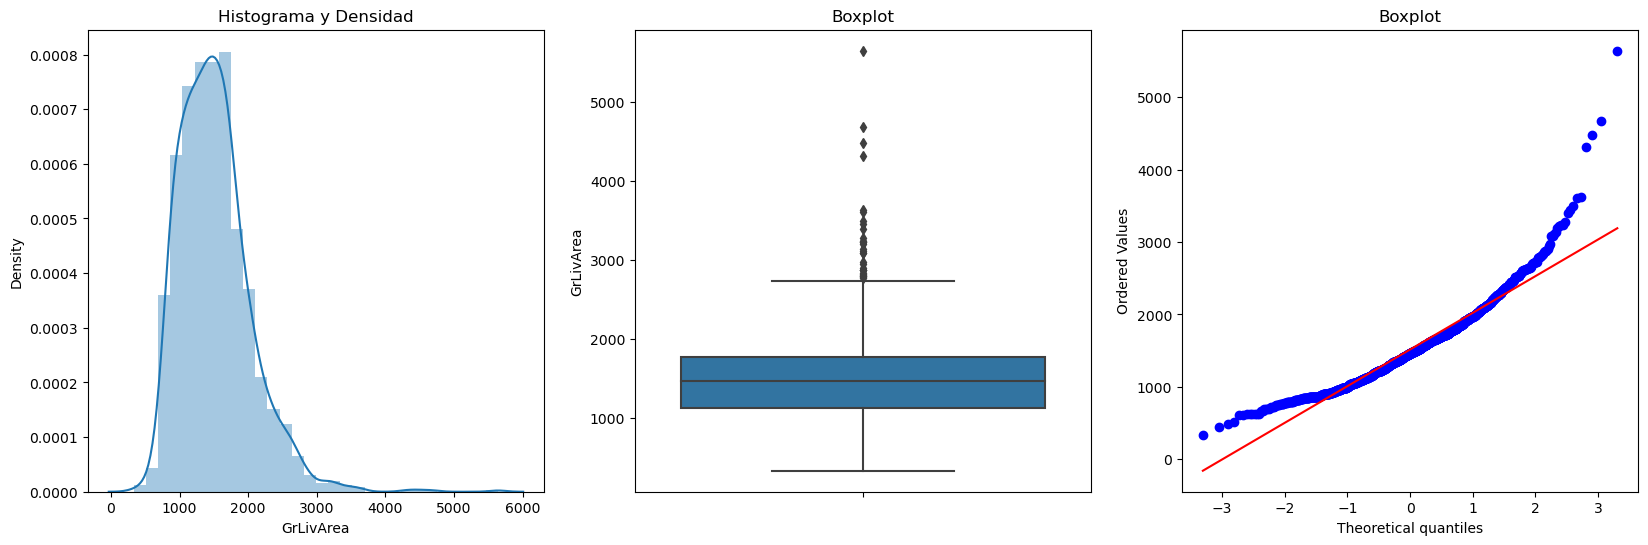

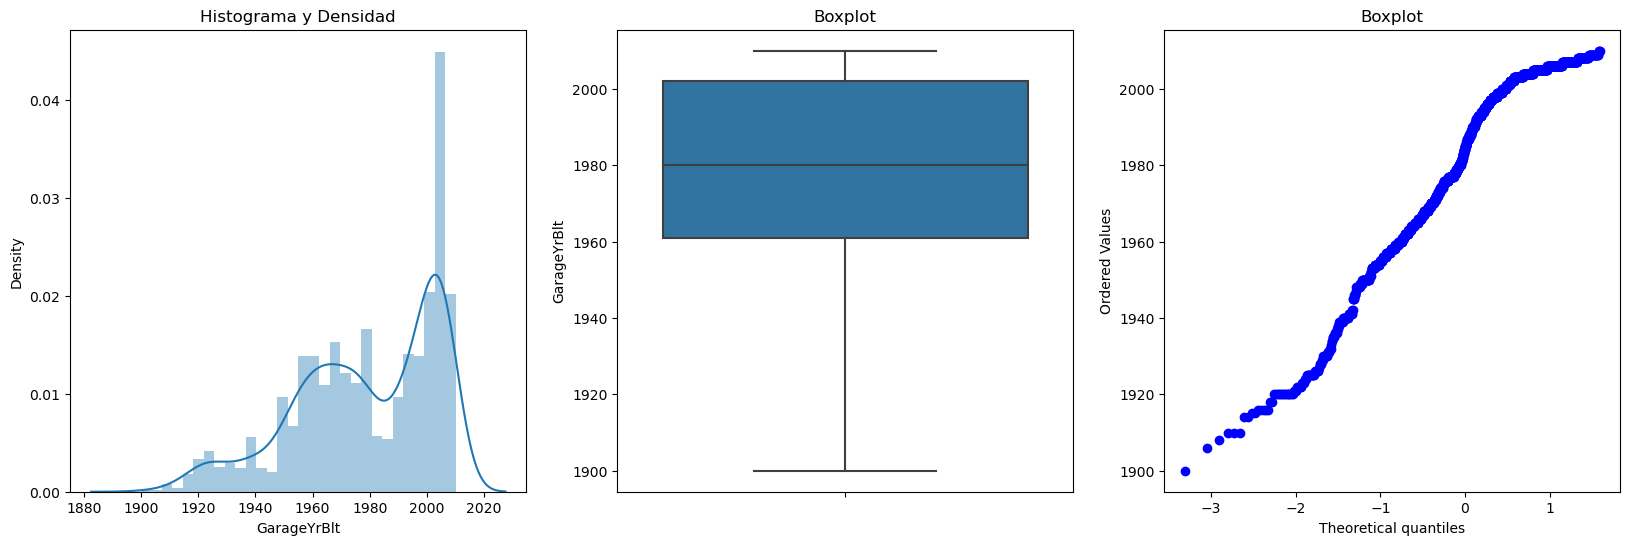

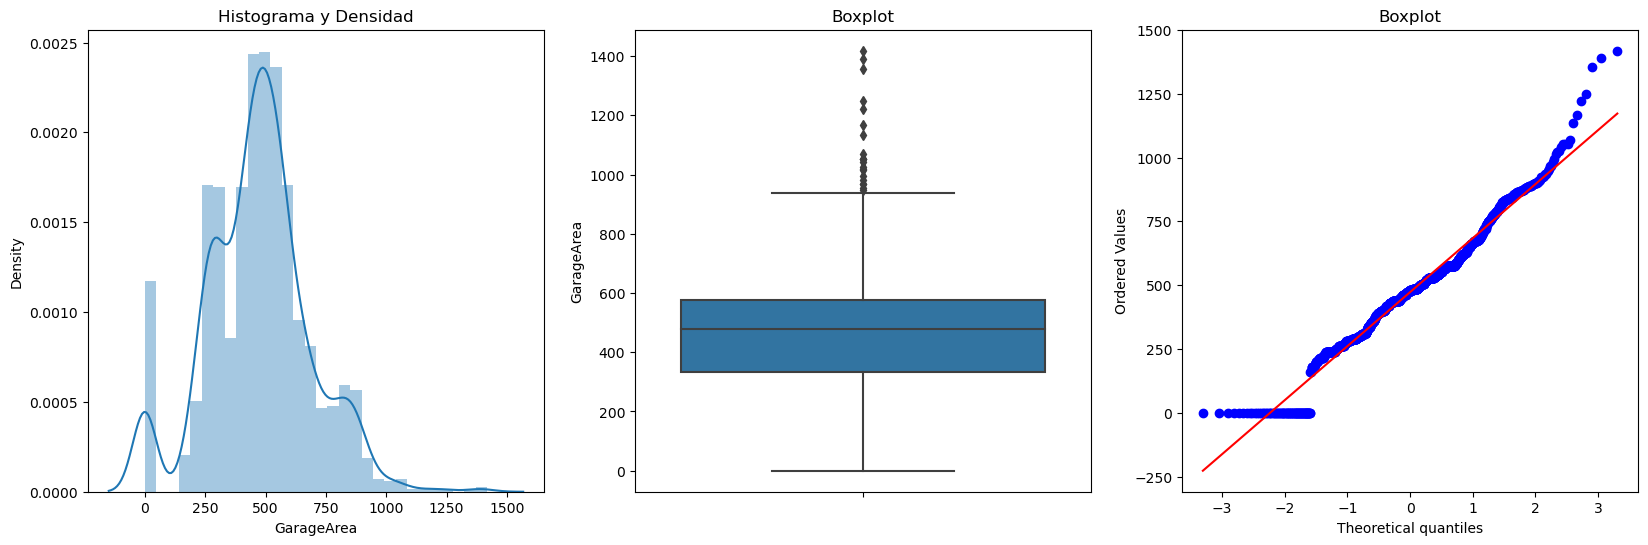

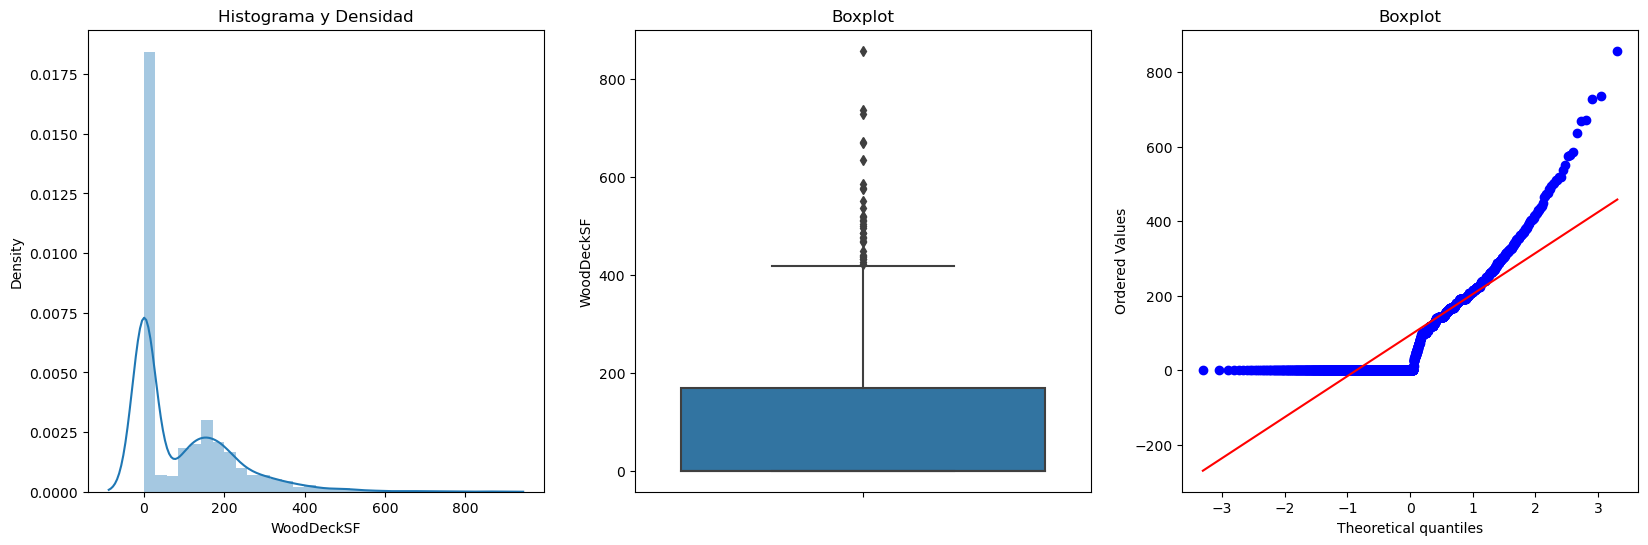

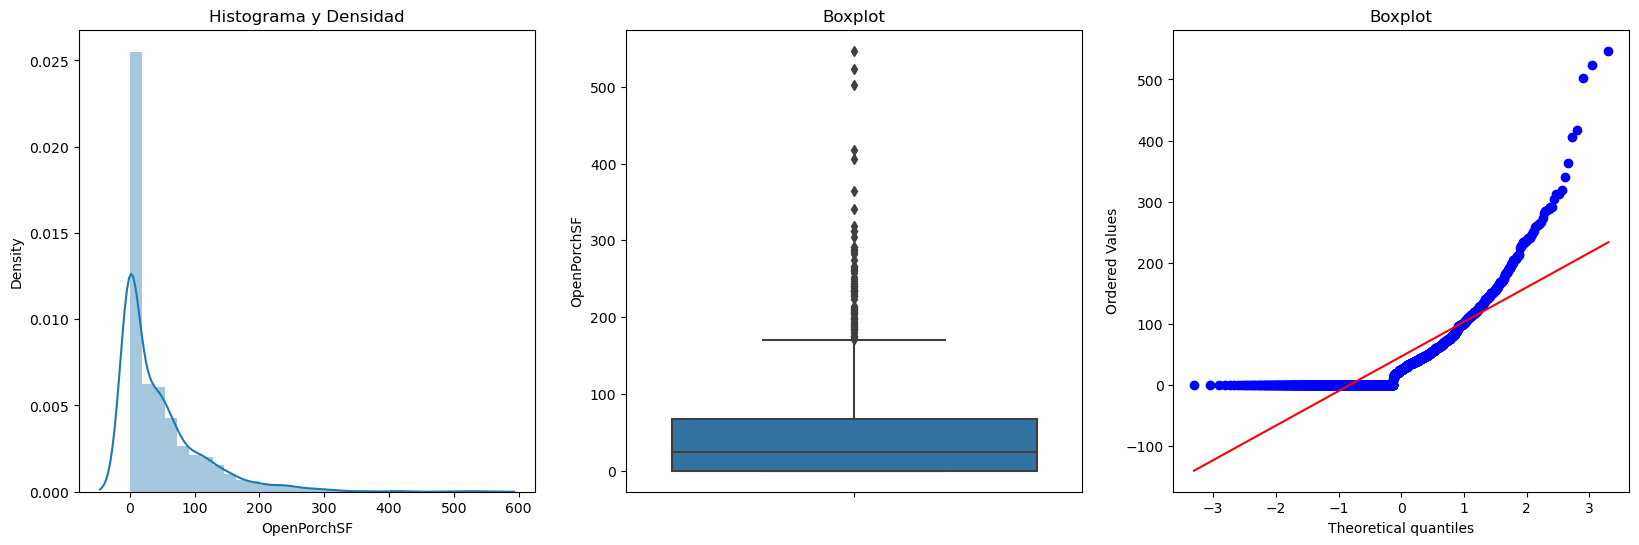

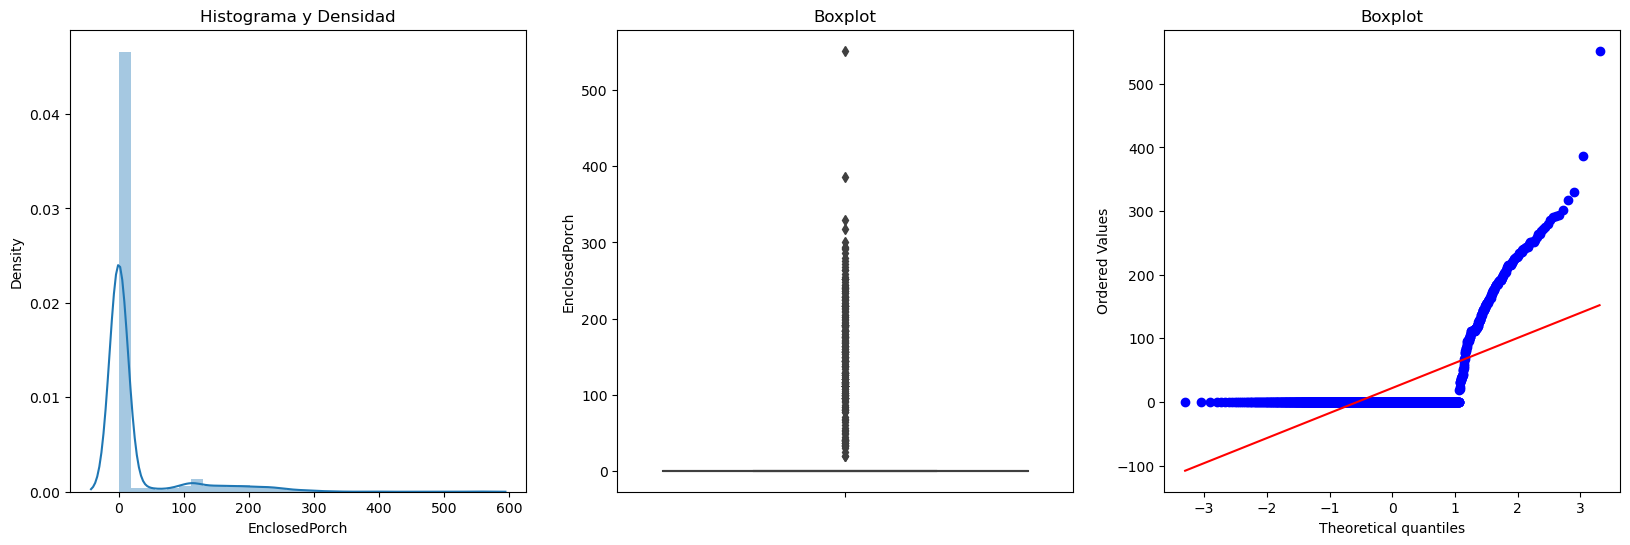

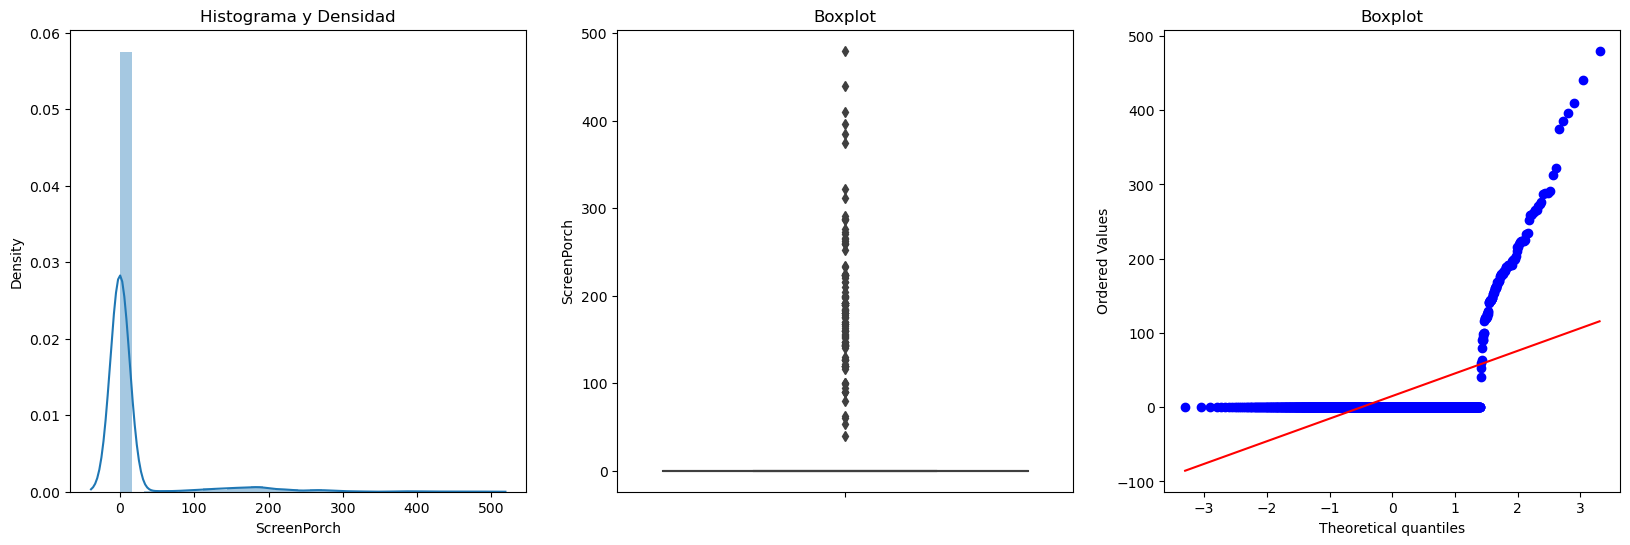

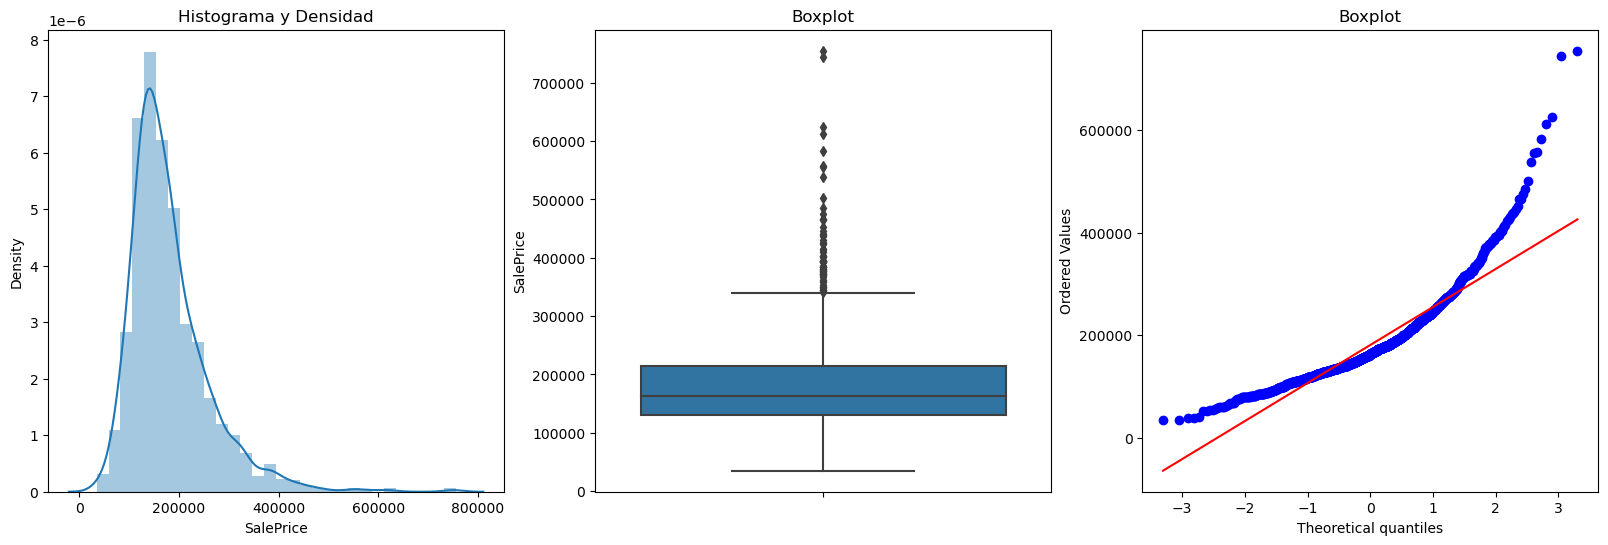

In [9]:
for col in continuas: 
    plotDistBoxQQ(dataHP,col)

In [10]:
## Creamos función para calcular el IQR, Limite inferior y limite superior. 

dataset = dataHP
col = 'LotArea' 
def detectOutliersLimits(dataset,col):
    '''
    Descripción: Calcula los limites superiores e inferiores para detección de outliers. 
    Input: dataset->pandas dataframe, col->string nombre de columna
    Output: tupla de floats con los limites superior e inferior (LI,LS)
    '''
    IQR = dataset[col].quantile(0.75)-dataset[col].quantile(0.25)
    LI = dataset[col].quantile(0.25) - (IQR*1.75)
    LS = dataset[col].quantile(0.75) + (IQR*1.75)
    
    return LI,LS


#### Capping

In [14]:
def cappingContinuas(dataset):
    '''
    Descripción: Aplica capping a las variables continuas  y convierte los valores negativos a cero
    Input: dataset -> pandas dataframe
    Output: pandas dataframe con las variables continuas cappeadas y valores negativos convertidos a cero
    '''
    continuas, _, _ = getColumnTypes(dataset)
    for col in continuas:
        LI, LS = detectOutliersLimits(dataset, col)
        dataset[col] = np.where(dataset[col] > LS, LS,
                                np.where(dataset[col] < LI, LI, dataset[col]))
        dataset[col] = np.where(dataset[col] < 0, 0, dataset[col])  # Convertir valores negativos a cero. 
    return dataset



In [12]:
dataHP_capped = cappingContinuas(dataHP)


C:\Users\Franz Castillo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Franz Castillo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Franz Castillo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

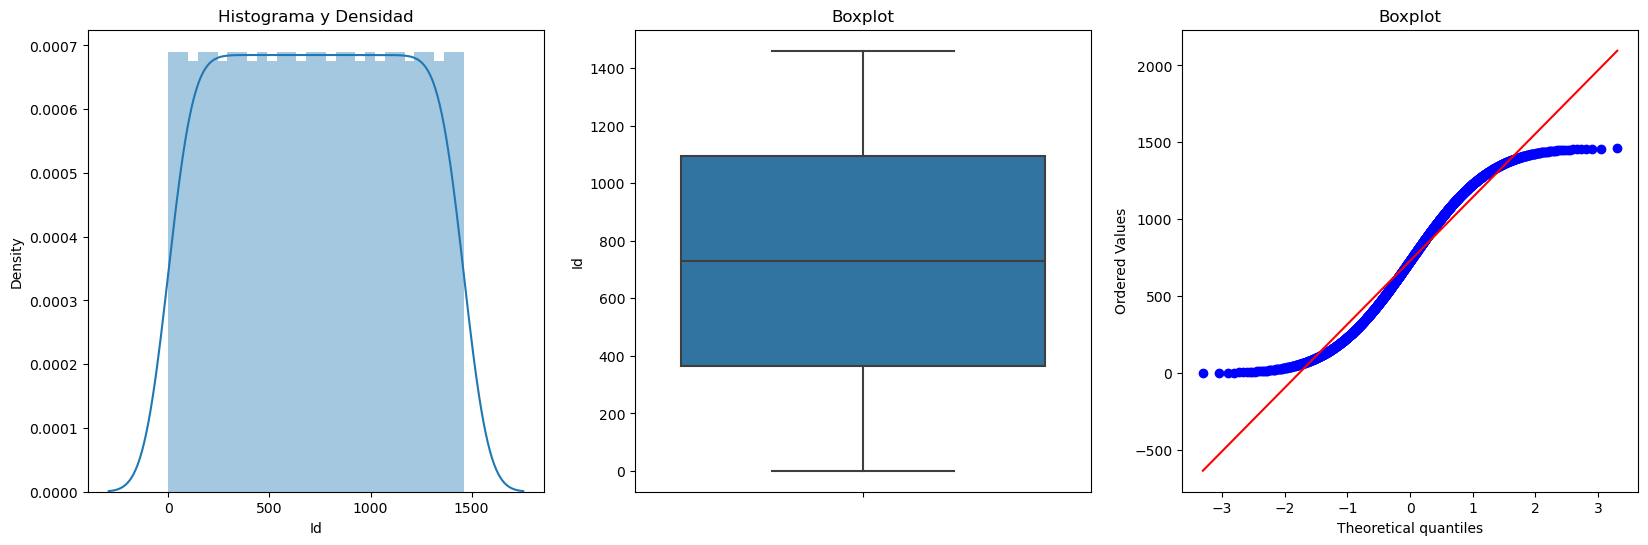

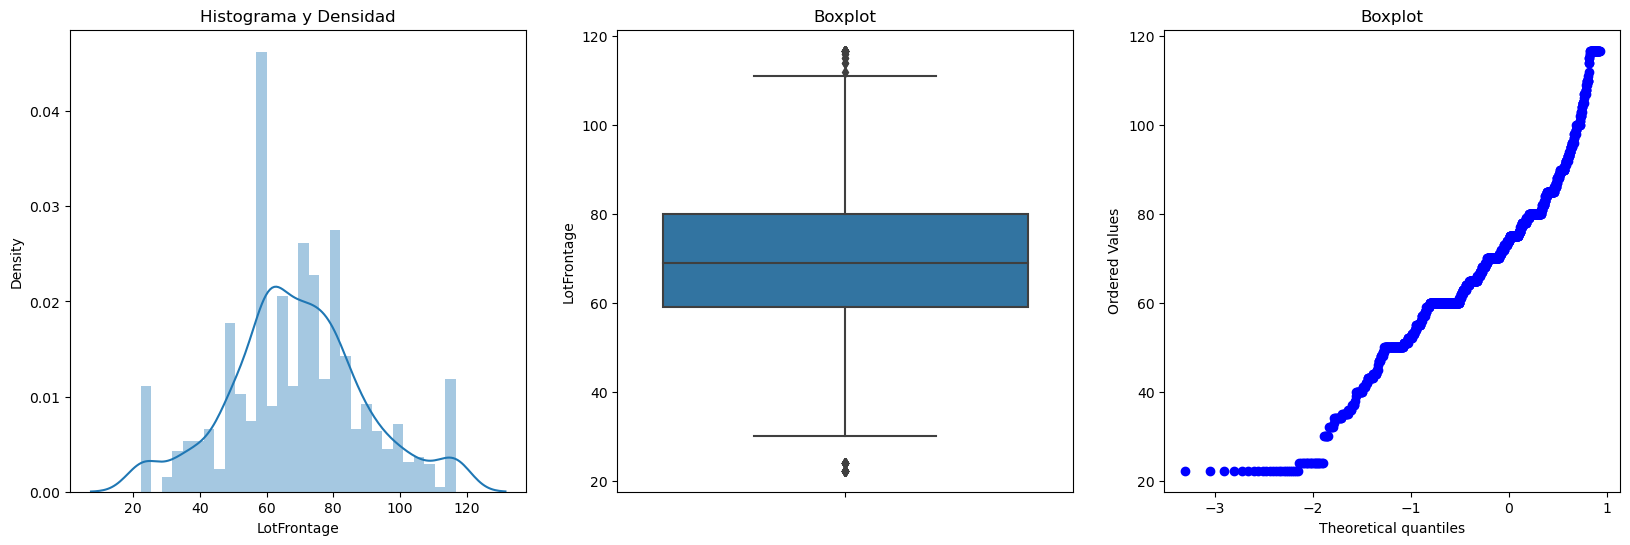

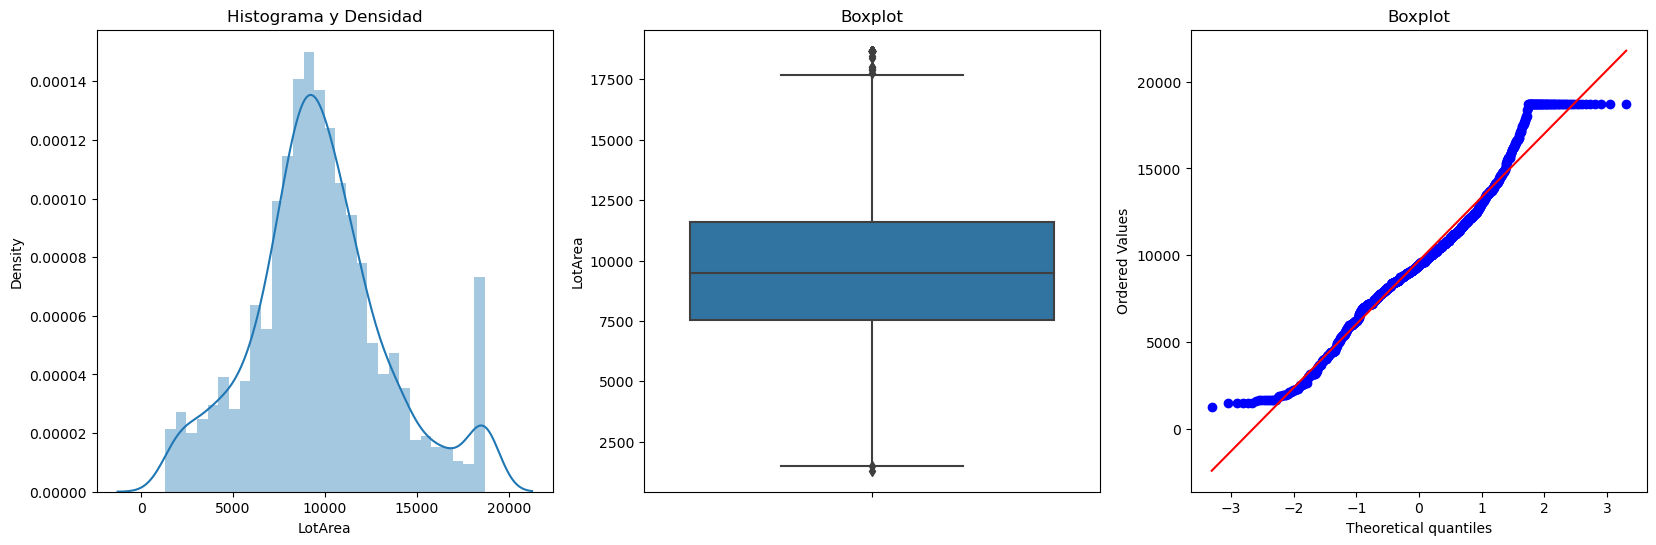

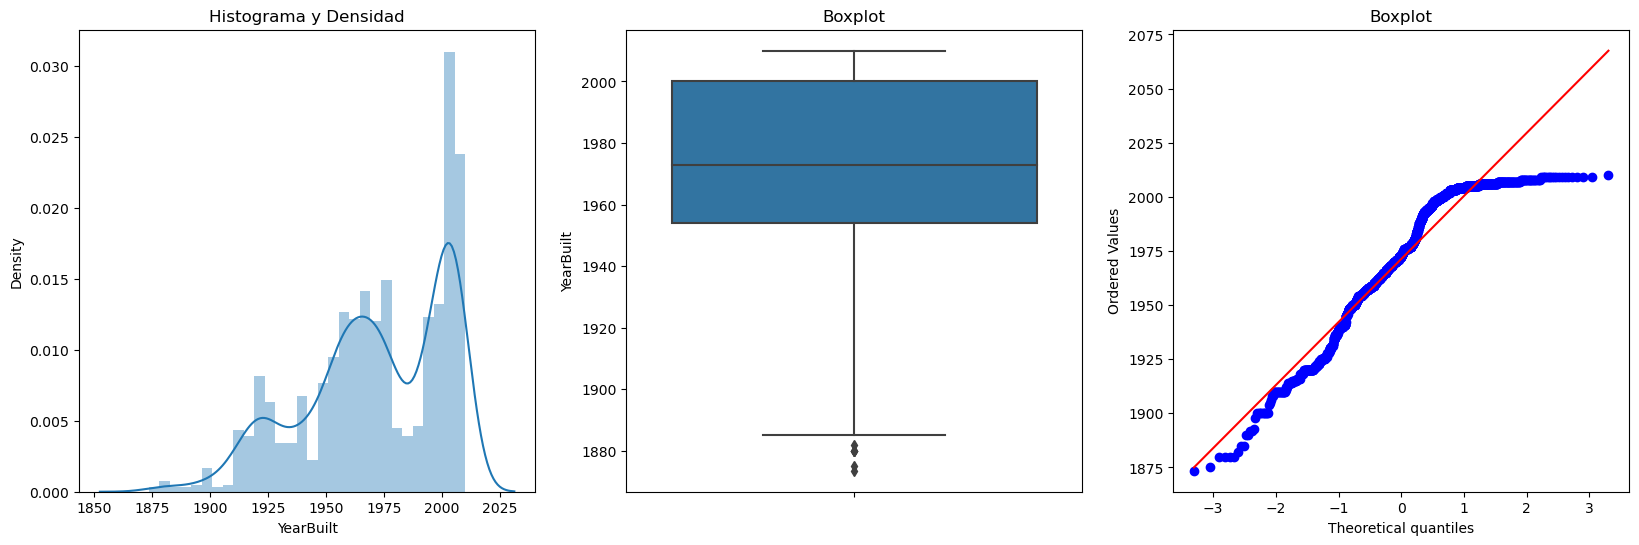

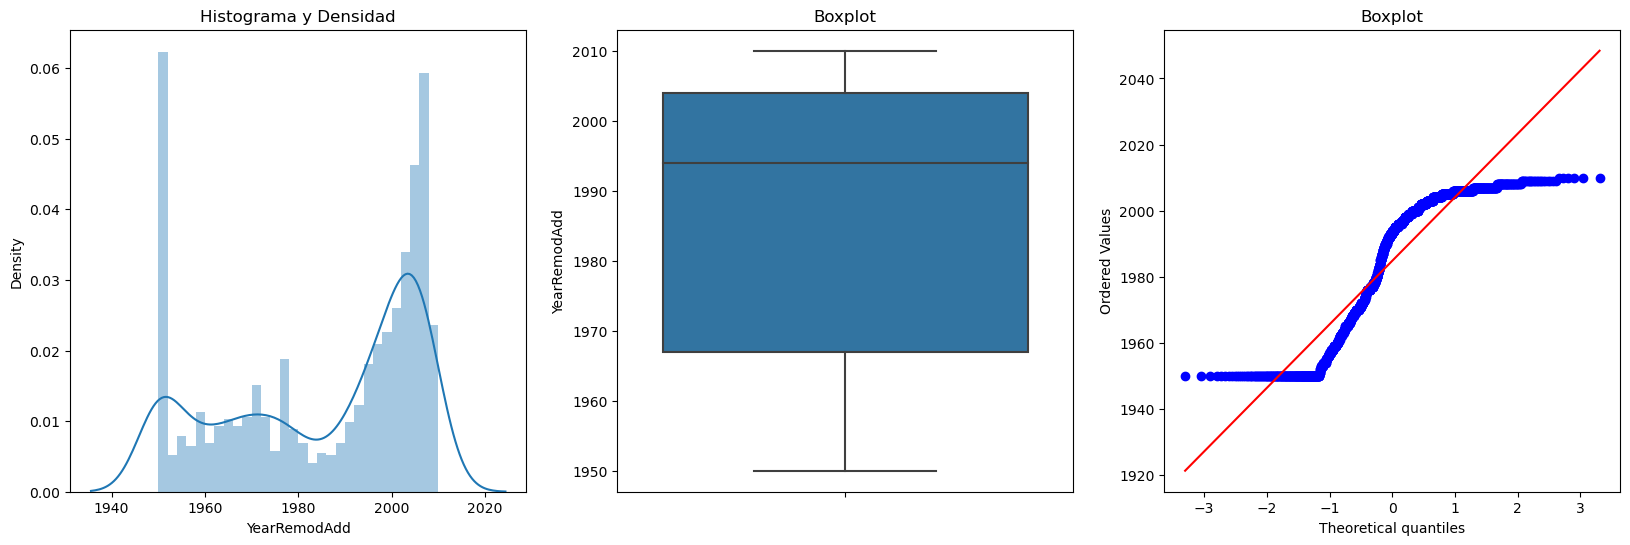

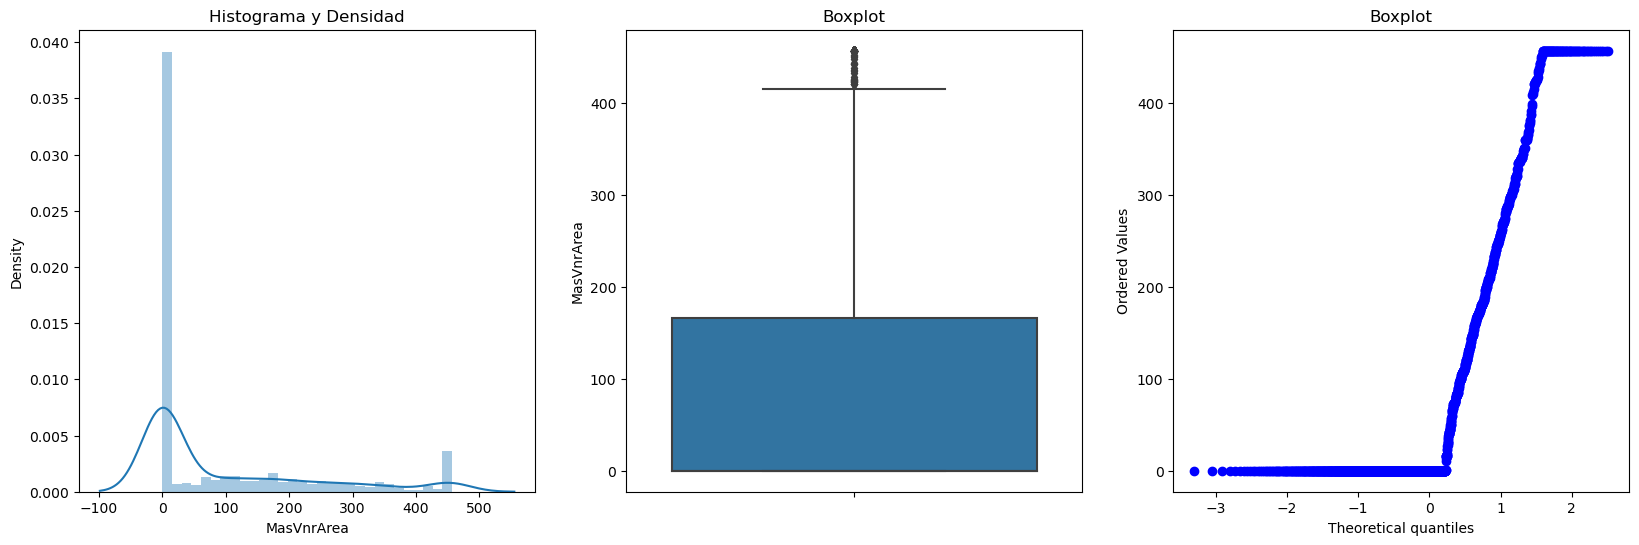

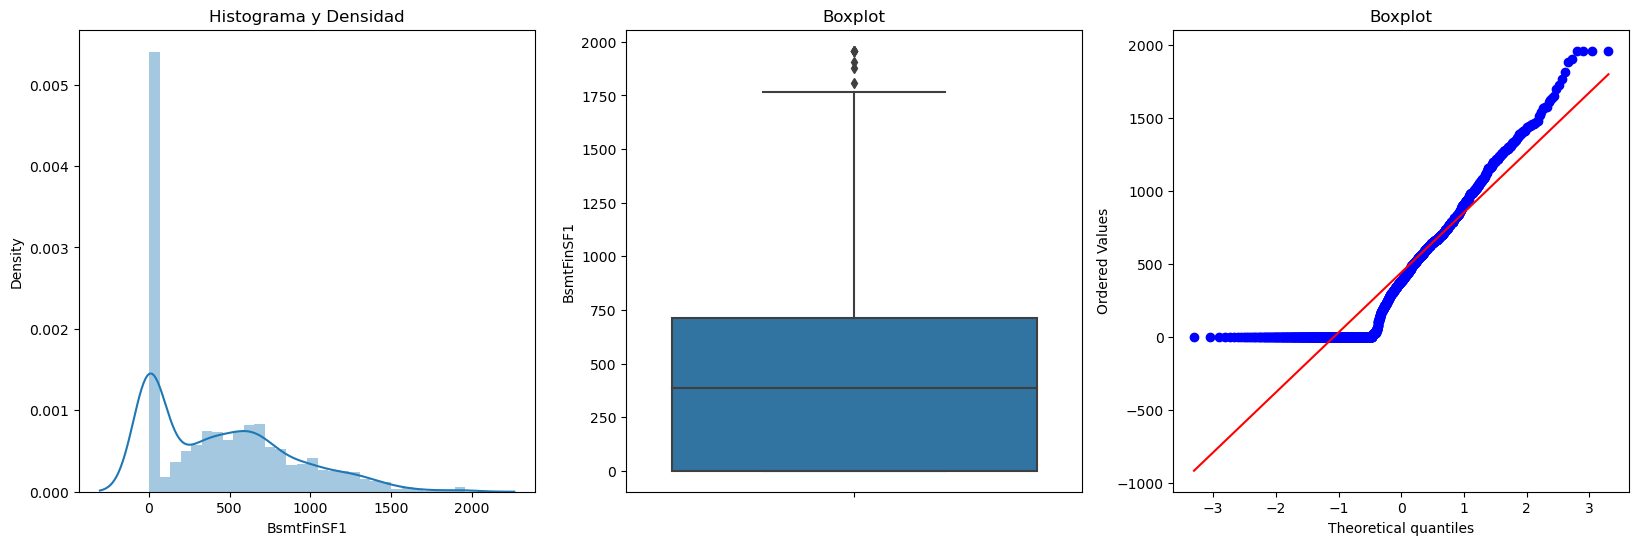

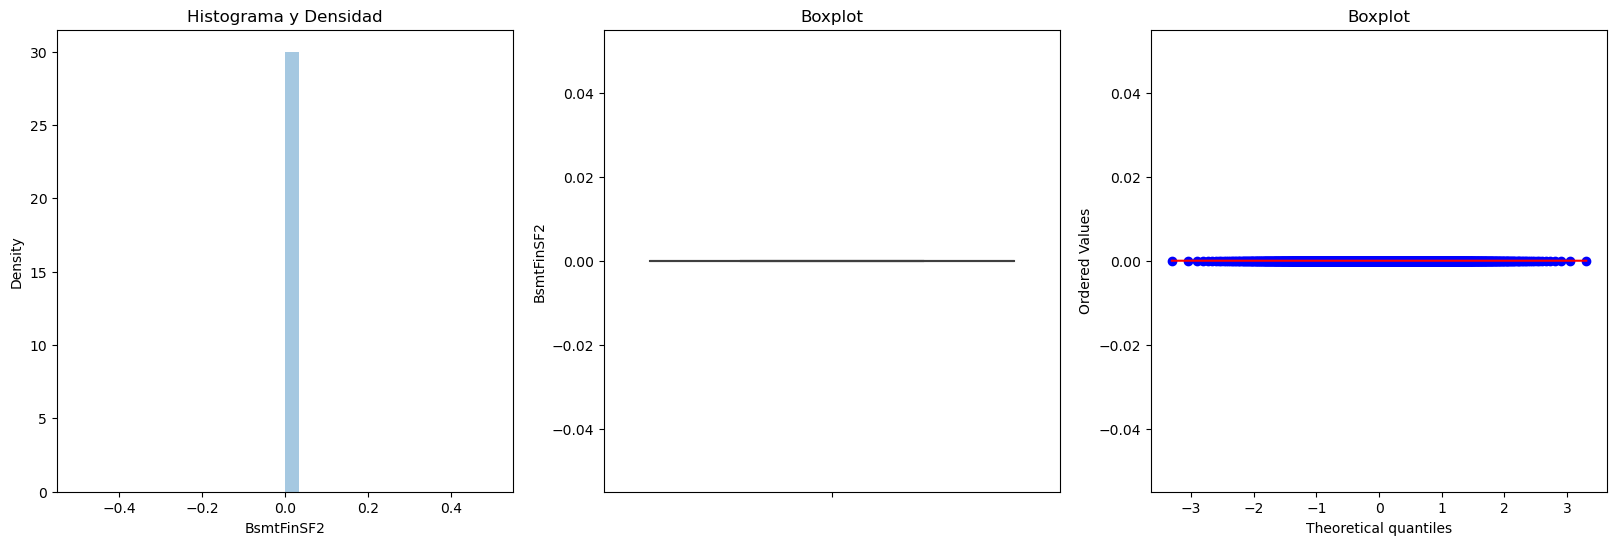

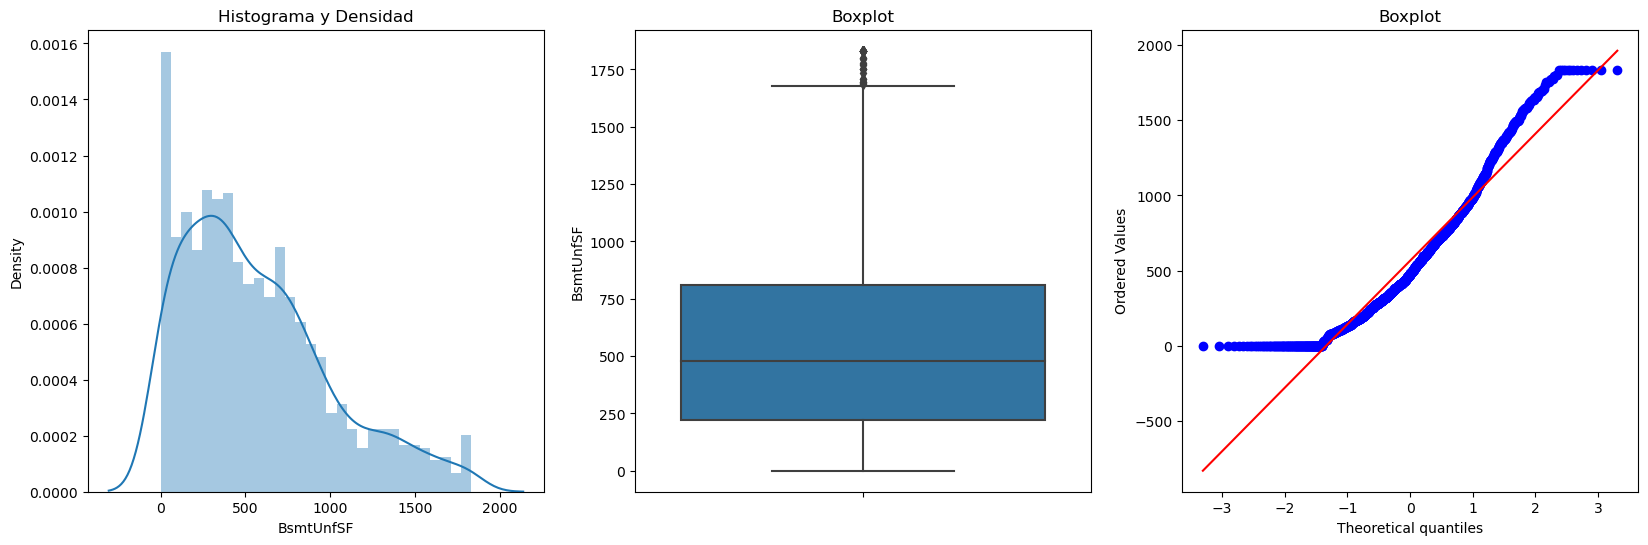

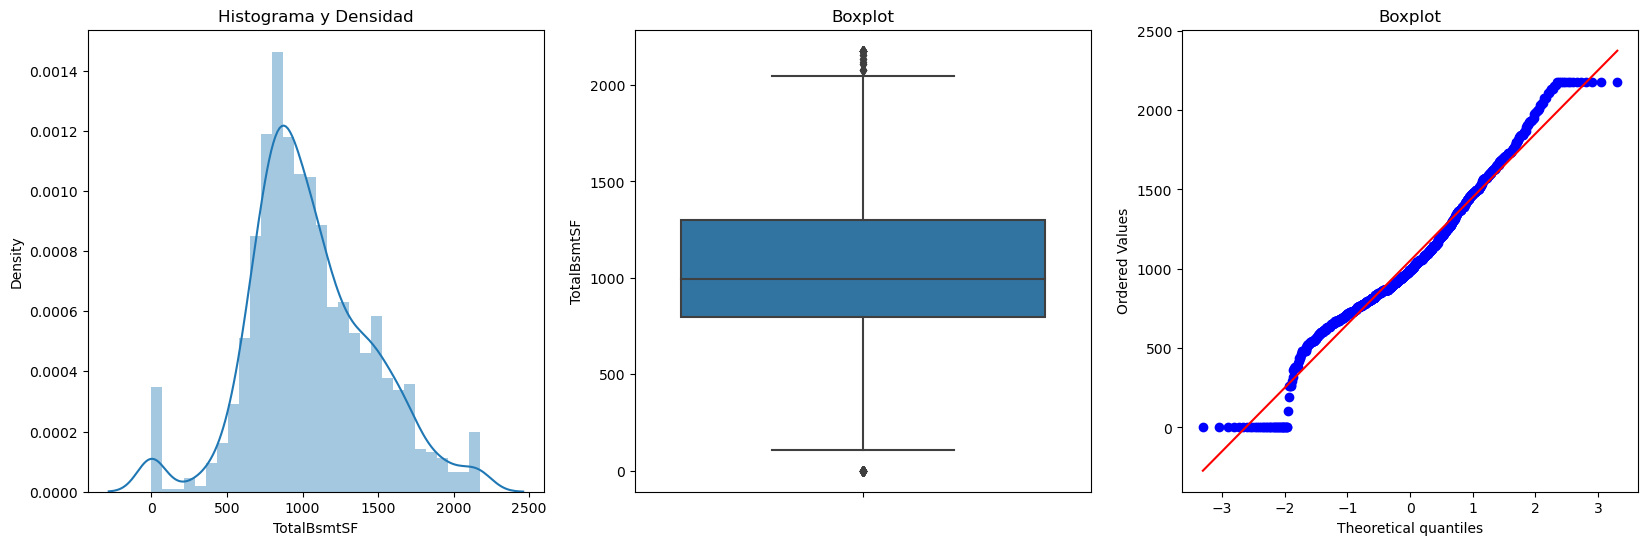

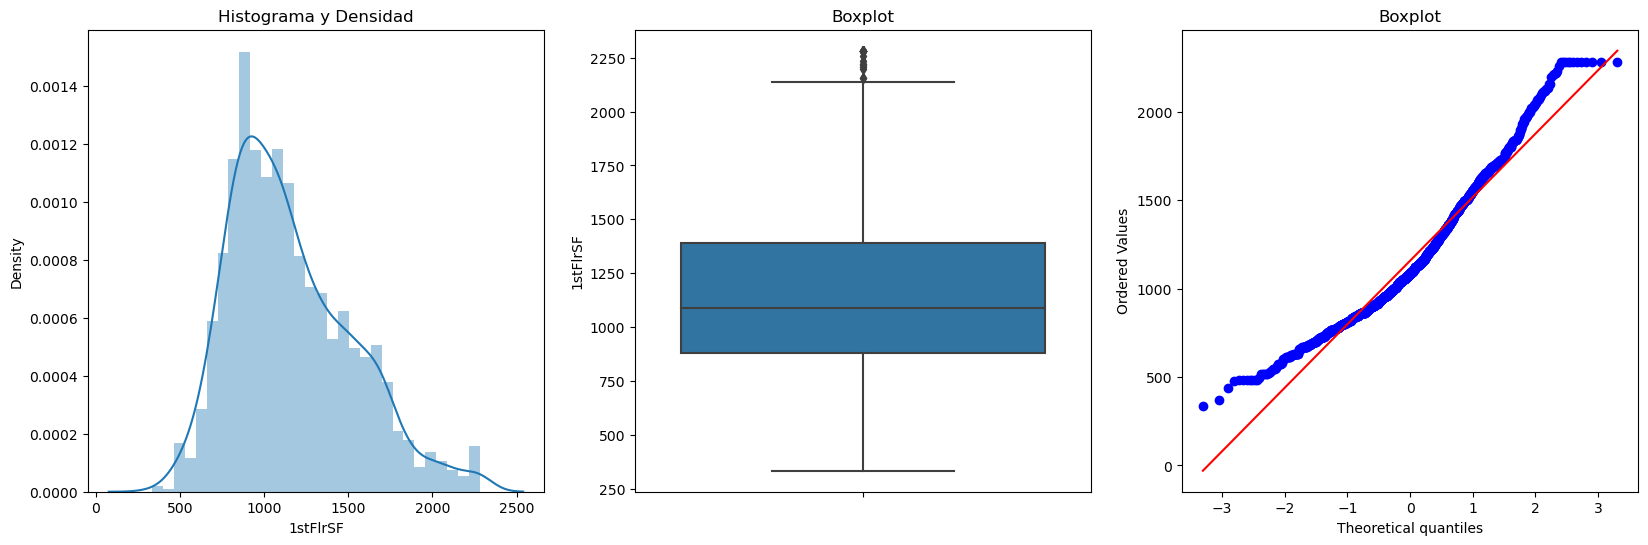

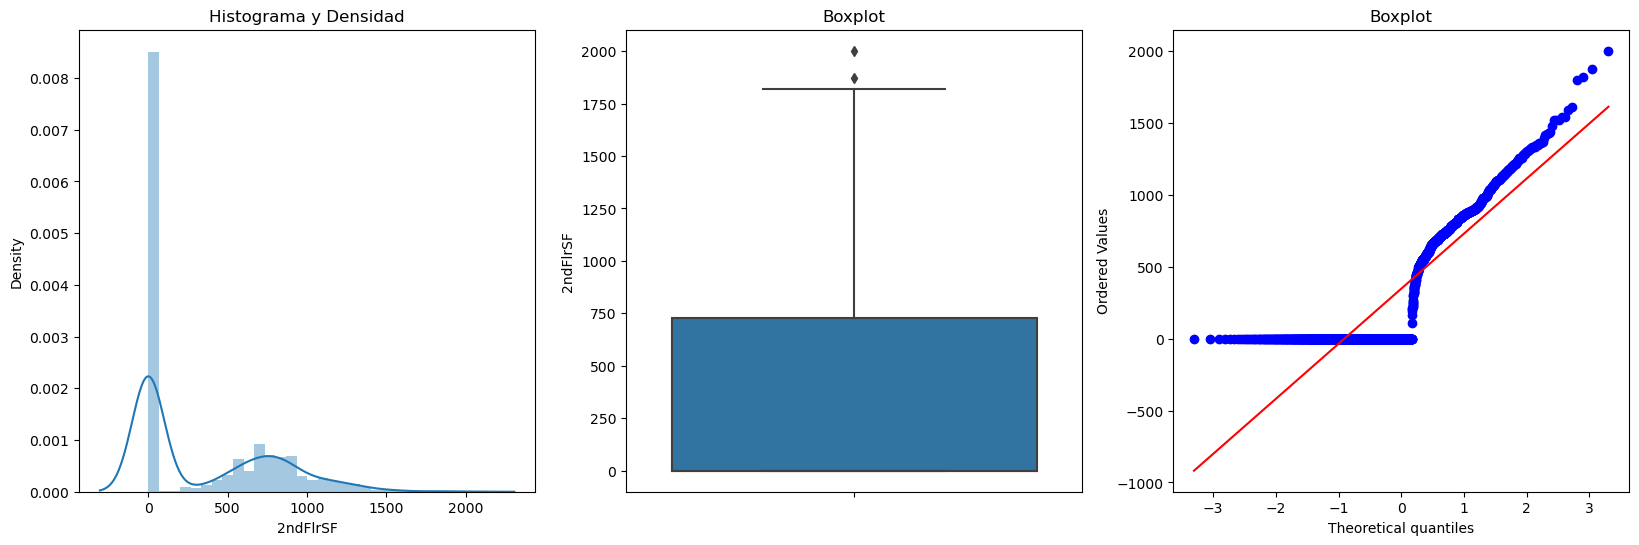

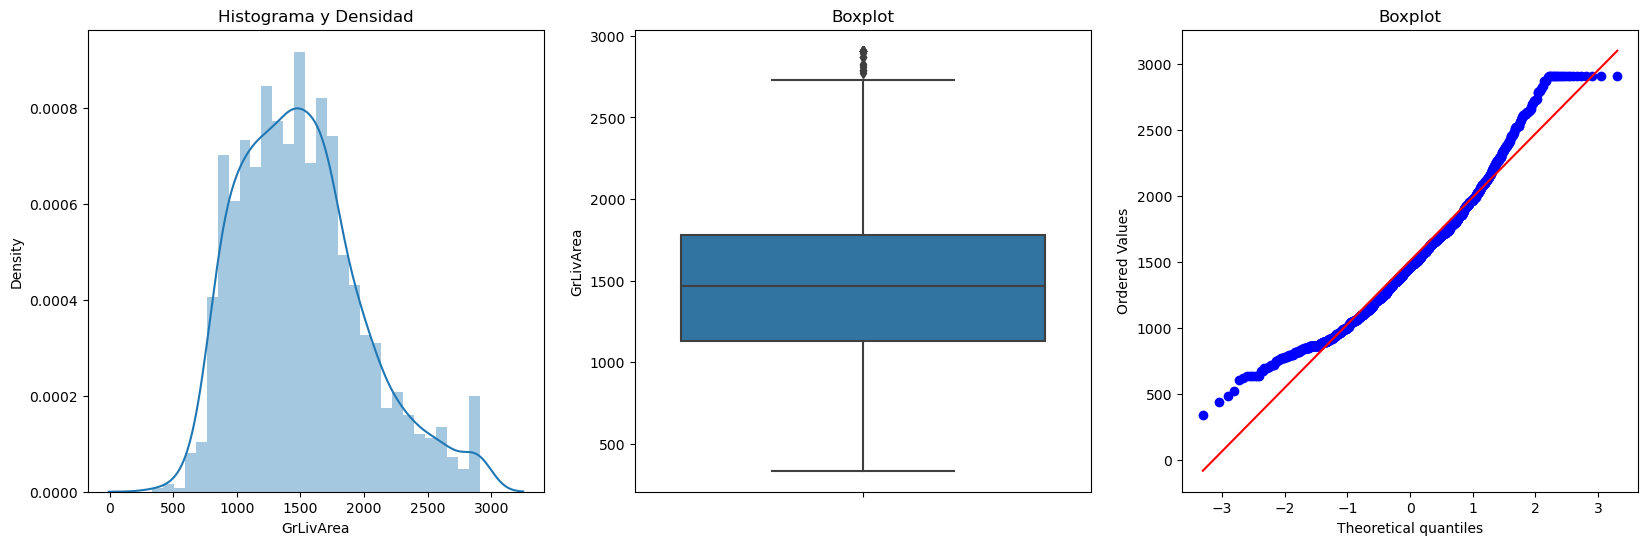

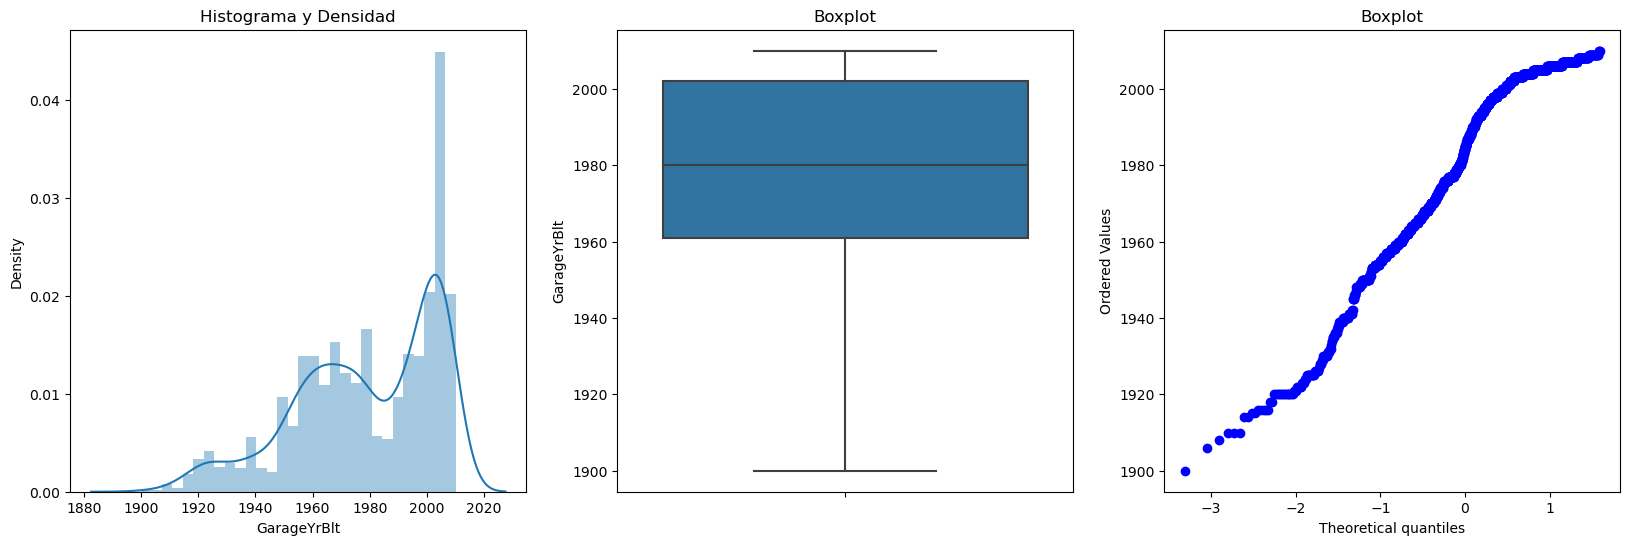

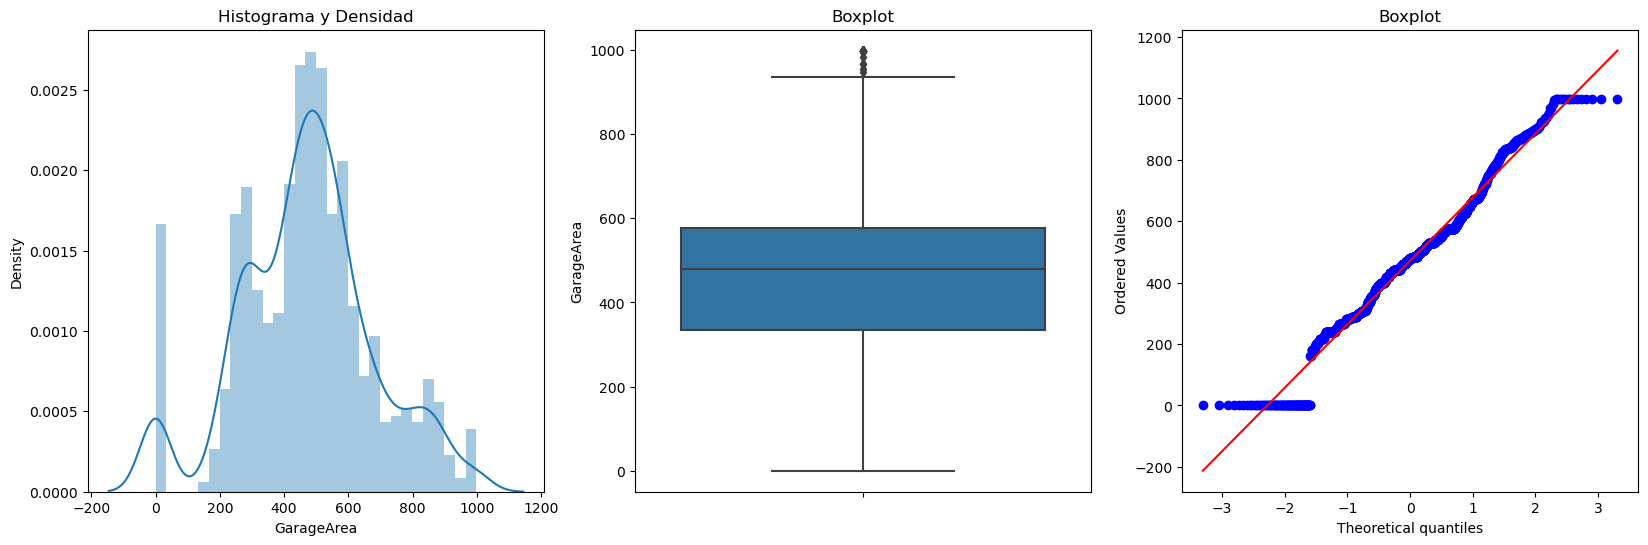

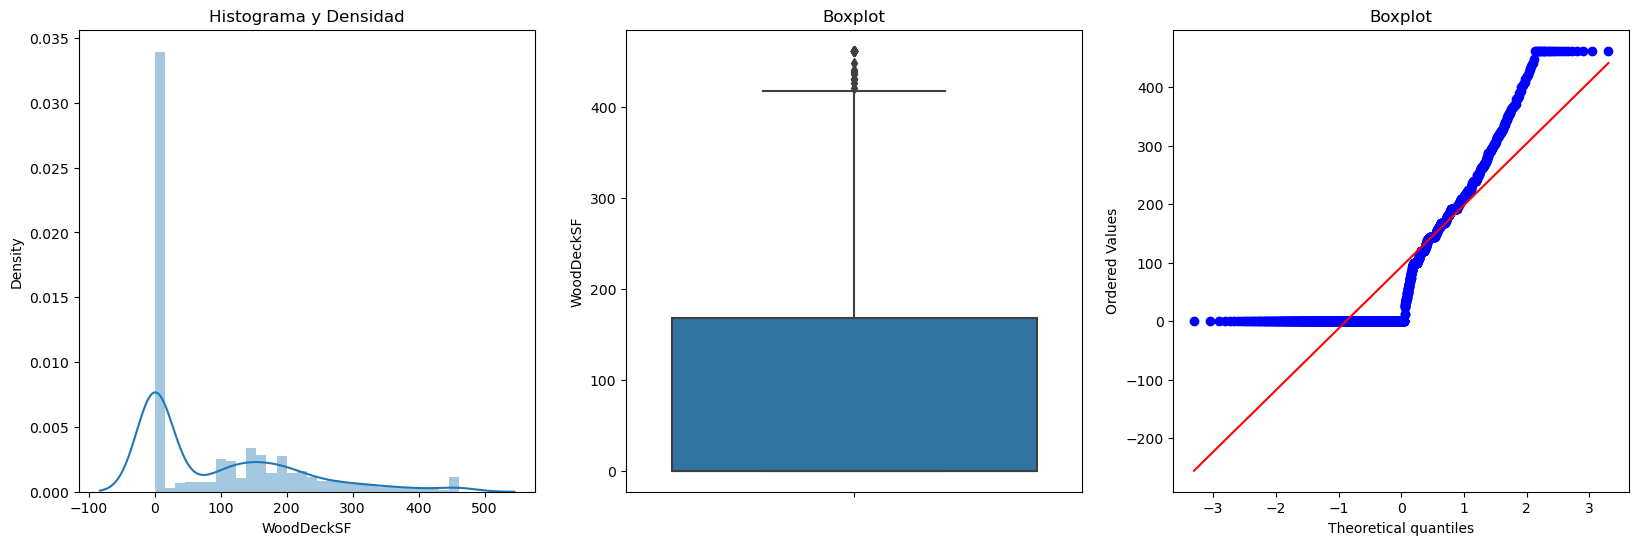

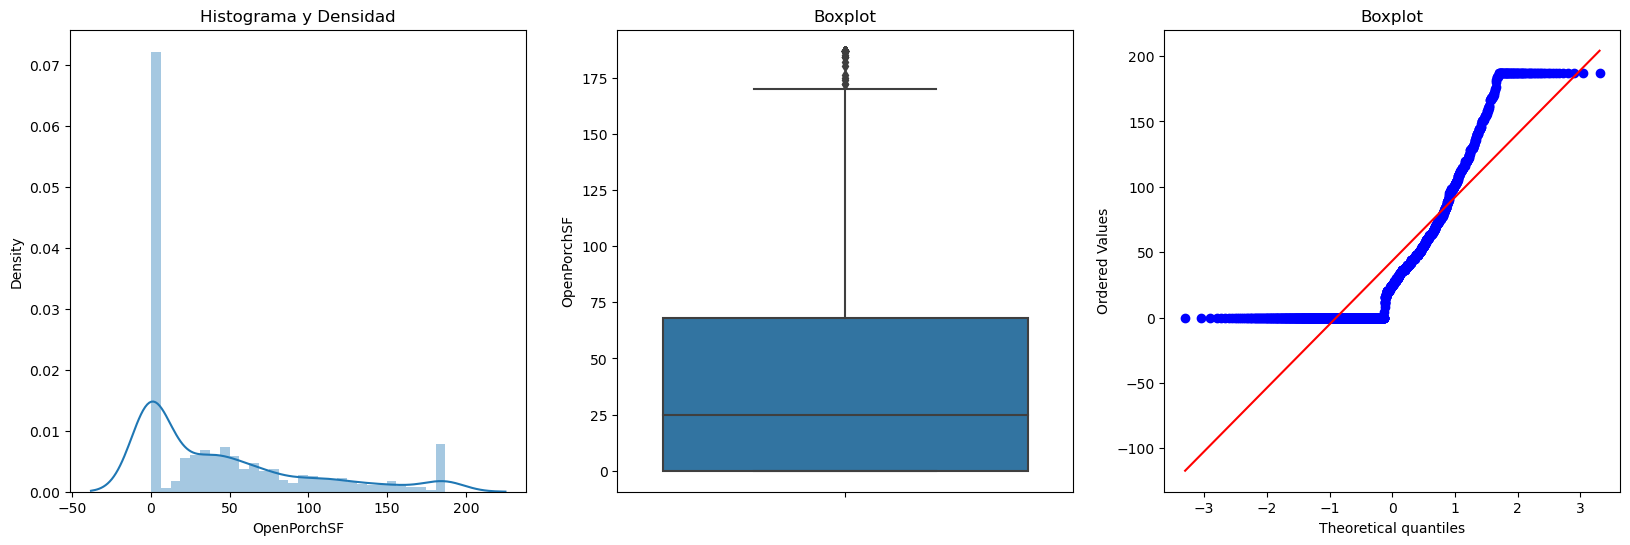

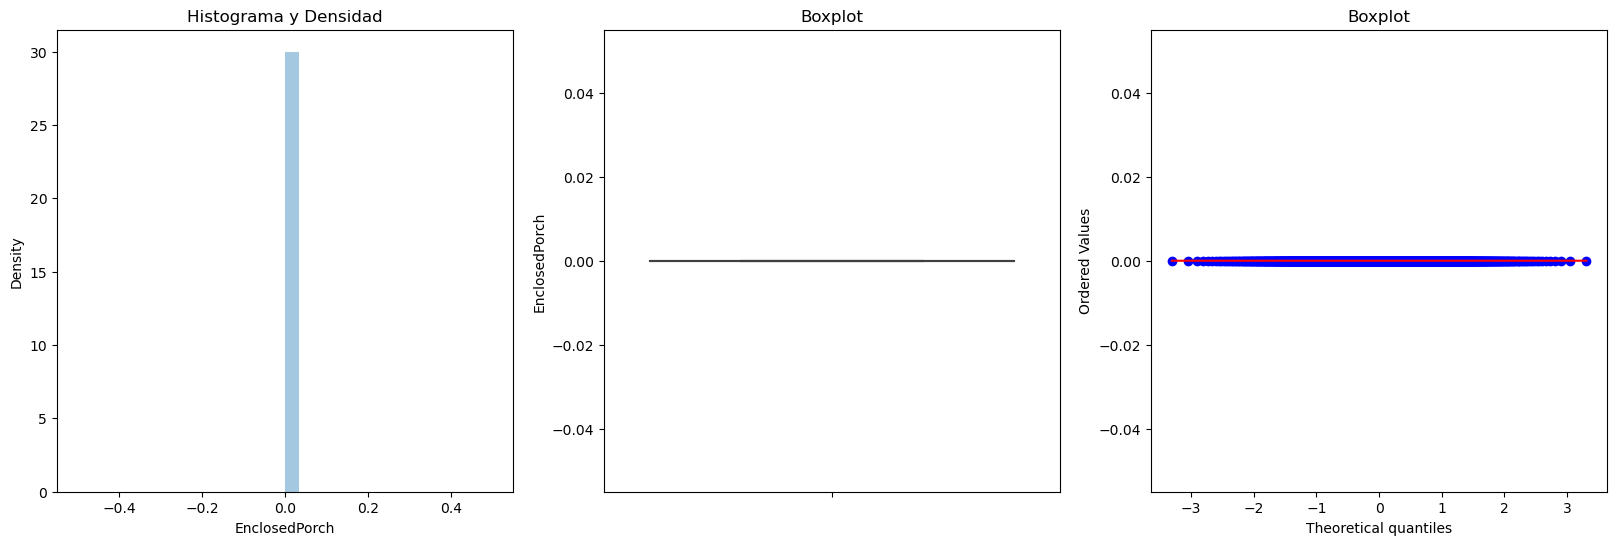

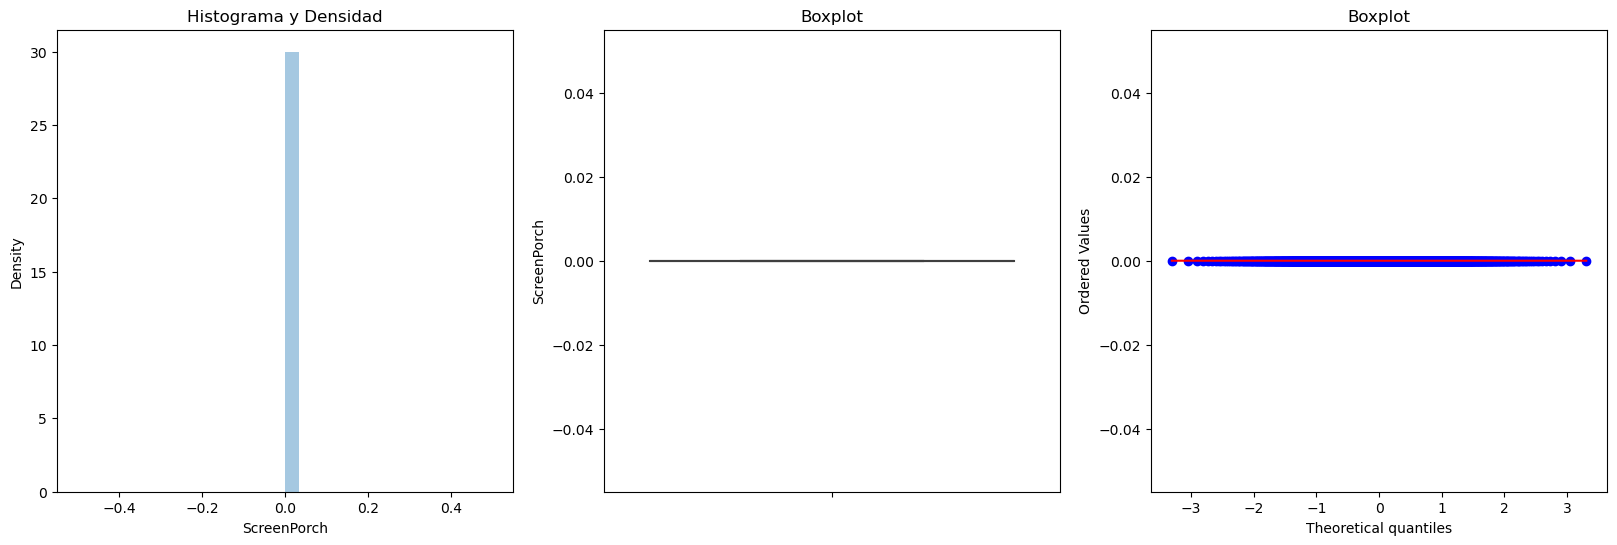

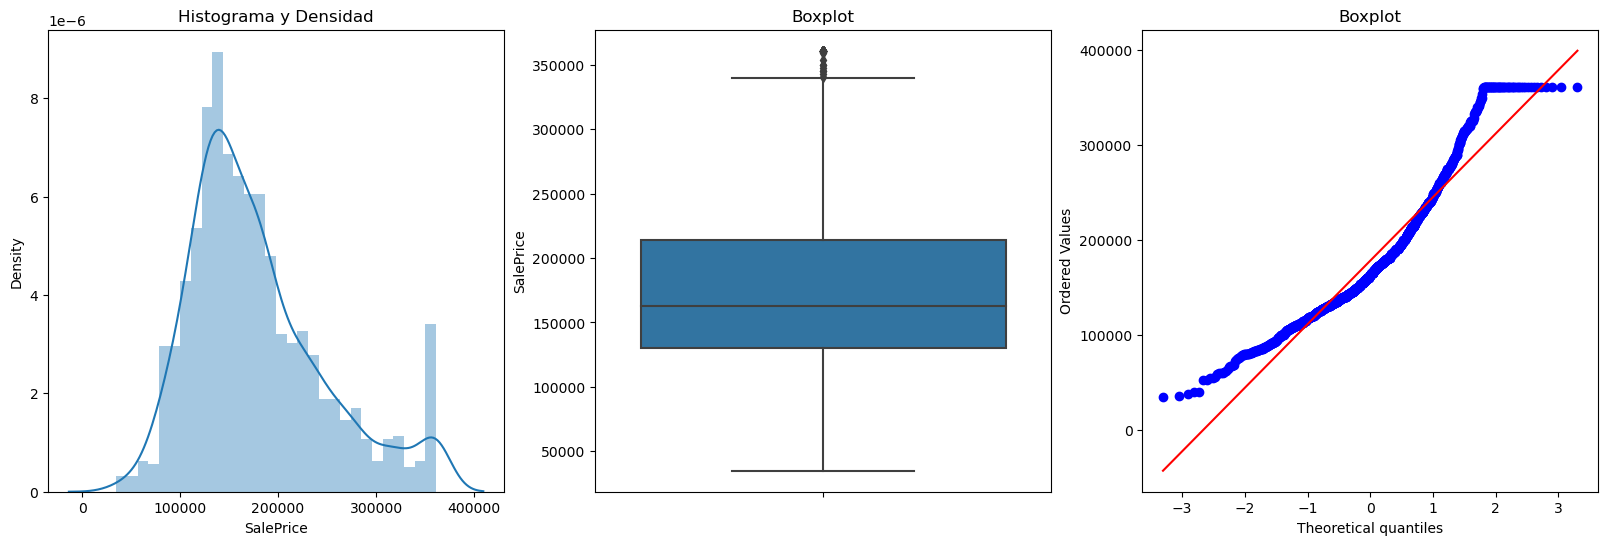

In [13]:
for col in continuas: 
    plotDistBoxQQ(dataHP,col)